### ADVANCED REGRESSION ASSIGNMENT - Submitted by Shailesh Kadre, AI ML C46 Oct 2022 Batch


### Background: 
Sunrise Housing Company is an US nased housing company and have an ambisius plans to do do new business in Australlian market. For this they need to purchase the low cost housing properties and sell them at higher prices at correct time. The old Australlian data is available in CSV format. From this data, a regularization based Regression model is required to make a business decision for the prediction of correct housing properties values and for the decesion making for the probable investments.

## Business Goals: 

Using advanced regression techniques, it is required to build a model of housing prices vs various independent variables. Following are the expectations from this regression model:
- The dependency of housing prices on the different independent variables
- The effect of selecting the right indepenedent variables on the housing prices
- The newly developed regression model should be able to predict the variations of these variables on housing prices


### The data set features are defined as follows: 
-	Id
-	MSSubClass
-	MSZoning
-	LotFrontage
-	LotArea
-	Street
-	Alley
-	LotShape
-	LandContour
-	Utilities
-	LotConfig
-	LandSlope
-	Neighborhood
-	Condition1
-	Condition2
-	BldgType
-	HouseStyle
-	OverallQual
-	OverallCond
-	YearBuilt
-	YearRemodAdd
-	RoofStyle
-	RoofMatl
-	Exterior1st
-	Exterior2nd
-	MasVnrType
-	MasVnrArea
-	ExterQual
-	ExterCond
-	Foundation
-	BsmtQual
-	BsmtCond
-	BsmtExposure
-	BsmtFinType1
-	BsmtFinSF1
-	BsmtFinType2
-	BsmtFinSF2
-	BsmtUnfSF
-	TotalBsmtSF
-	Heating
-	HeatingQC
-	CentralAir
-	Electrical
-	1stFlrSF
-	2ndFlrSF
-	LowQualFinSF
-	GrLivArea
-	BsmtFullBath
-	BsmtHalfBath
-	FullBath
-	HalfBath
-	BedroomAbvGr
-	KitchenAbvGr
-	KitchenQual
-	TotRmsAbvGrd
-	Functional
-	Fireplaces
-	FireplaceQu
-	GarageType
-	GarageYrBlt
-	GarageFinish
-	GarageCars
-	GarageArea
-	GarageQual
-	GarageCond
-	PavedDrive
-	WoodDeckSF
-	OpenPorchSF
-	EnclosedPorch
-	3SsnPorch
-	ScreenPorch
-	PoolArea
-	PoolQC
-	Fence
-	MiscFeature
-	MiscVal
-	MoSold
-	YrSold
-	SaleType
-	SaleCondition
-	SalePrice


#### Following main steps were performed for this analysis

- Data Exploration , including missing values and outliers.
    - Univariate Analysis
    -  Segmented Univariate Analysis
    - Bivariate Analysis
    - Heat Maps
- Data cleansing
     - Elaborate Missing value treatment
     - Outlier Treatment
- Feature Engineering
     - Deriving new useful features
     - Other feature engineering activities
     - Dummy variables
     - Feature transformation using BocCox1p
     - Feature scaling with StandardScaler
- Preaparing data Reression Model
     - Train-Test split
     - Treating multicolinearity
     - Why VIF is not used
- Regression Moel with Regularizaiton
     - Building Ridge model and finding out ptimum alpha and getting top features
     - Building Lasso model and finding out ptimum alpha and getting top features

- Analyst's Final Recommendations

In [1]:
#  python libraries required for this task
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
sns.set_context('poster',font_scale=0.8)

In [2]:
# Import the Australlian Housing data
df_Aushouse = pd.read_csv('train.csv')

In [3]:
# Data inpection of first few rows
df_Aushouse.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Check for number of rows in the dataset
df_Aushouse.shape 

(1460, 81)

- We have very few (1460) data as compared to 81 features so the train/ test split should be 80 to 20 ratio for the accurare regression model

In [5]:
# The vaiable info

df_Aushouse.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The vaiables are in 3 major buckets
- Integer varables
- Float Varoables
- Object variables

In [6]:
#  Function to define null values
# Check for null values 
df_check_null_value = df_Aushouse.isnull().sum() / len(df_Aushouse) * 100
type(df_check_null_value)

pandas.core.series.Series

In [7]:
# Check % of null values

df_check_null_value = df_check_null_value.drop(df_check_null_value[df_check_null_value == 0].index).sort_values(ascending=False)[:90]
df_missing_data_value = pd.DataFrame({'Missing Ratio' :df_check_null_value})
df_missing_data_value.head(25)

Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageYrBlt        5.547945
GarageType         5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtFinType2       2.602740
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493

From the above columns, following observations can be made
Following five variables have null values more than 40%
- PoolQC	--     99.520548
- MiscFeature	--- 96.301370
- Alley--  	    93.767123
- Fence	        80.753425
- FireplaceQu	    47.260274

These vaiables will be dropped as first step without affecting the quality of model

In [8]:
# Drop columns whose null values are greater than 40%
df_house_it1 = df_Aushouse.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1)
df_house_it1.shape # Check for the dropped columns

(1460, 76)

In [9]:
# Once again check for missing %
df_check_null_value_it1 = df_house_it1.isnull().sum() / len(df_house_it1) * 100
df_check_null_value_it1 = df_check_null_value_it1.drop(df_check_null_value_it1[df_check_null_value_it1 == 0].index).sort_values(ascending=False)[:90]
df_missing_data_value_itr1 = pd.DataFrame({'Missing Ratio' :df_check_null_value_it1})
df_missing_data_value_itr1 

Missing Ratio
LotFrontage       17.739726
GarageCond         5.547945
GarageQual         5.547945
GarageFinish       5.547945
GarageYrBlt        5.547945
GarageType         5.547945
BsmtFinType2       2.602740
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493

- Number of rows can not be dropped as they are already low in numbers

In [10]:
# Number of colums with some missing rows:
df_missing_data_value_itr1.shape

(14, 1)

### Exploratorty data analysis

####  Univariate analysis
 - Seperating the Numerical and Character variables

In [11]:
# Identification of Numeric variables
df_house_it1_num = list(df_house_it1.columns[df_house_it1.dtypes != 'object'])
len(df_house_it1_num)

38

In [12]:
df_house_it1_charact = list(df_house_it1.columns[df_house_it1.dtypes == 'object'])
len(df_house_it1_charact)

38

In [13]:
# function to plot histograms  

def plotDistribution(df_house_it1_num):

    plt.figure(figsize=(24, 35))
    for var in df_house_it1_num:
        plt.subplot(10,4,df_house_it1_num.index(var)+1)
        ax = sns.distplot(df_house_it1[[var]], hist=True, rug=True,  kde_kws={'bw': 1.5})
        plt.title(var)
    plt.tight_layout()
    plt.show()

# Histogram plot for Numerical variables

C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: Future

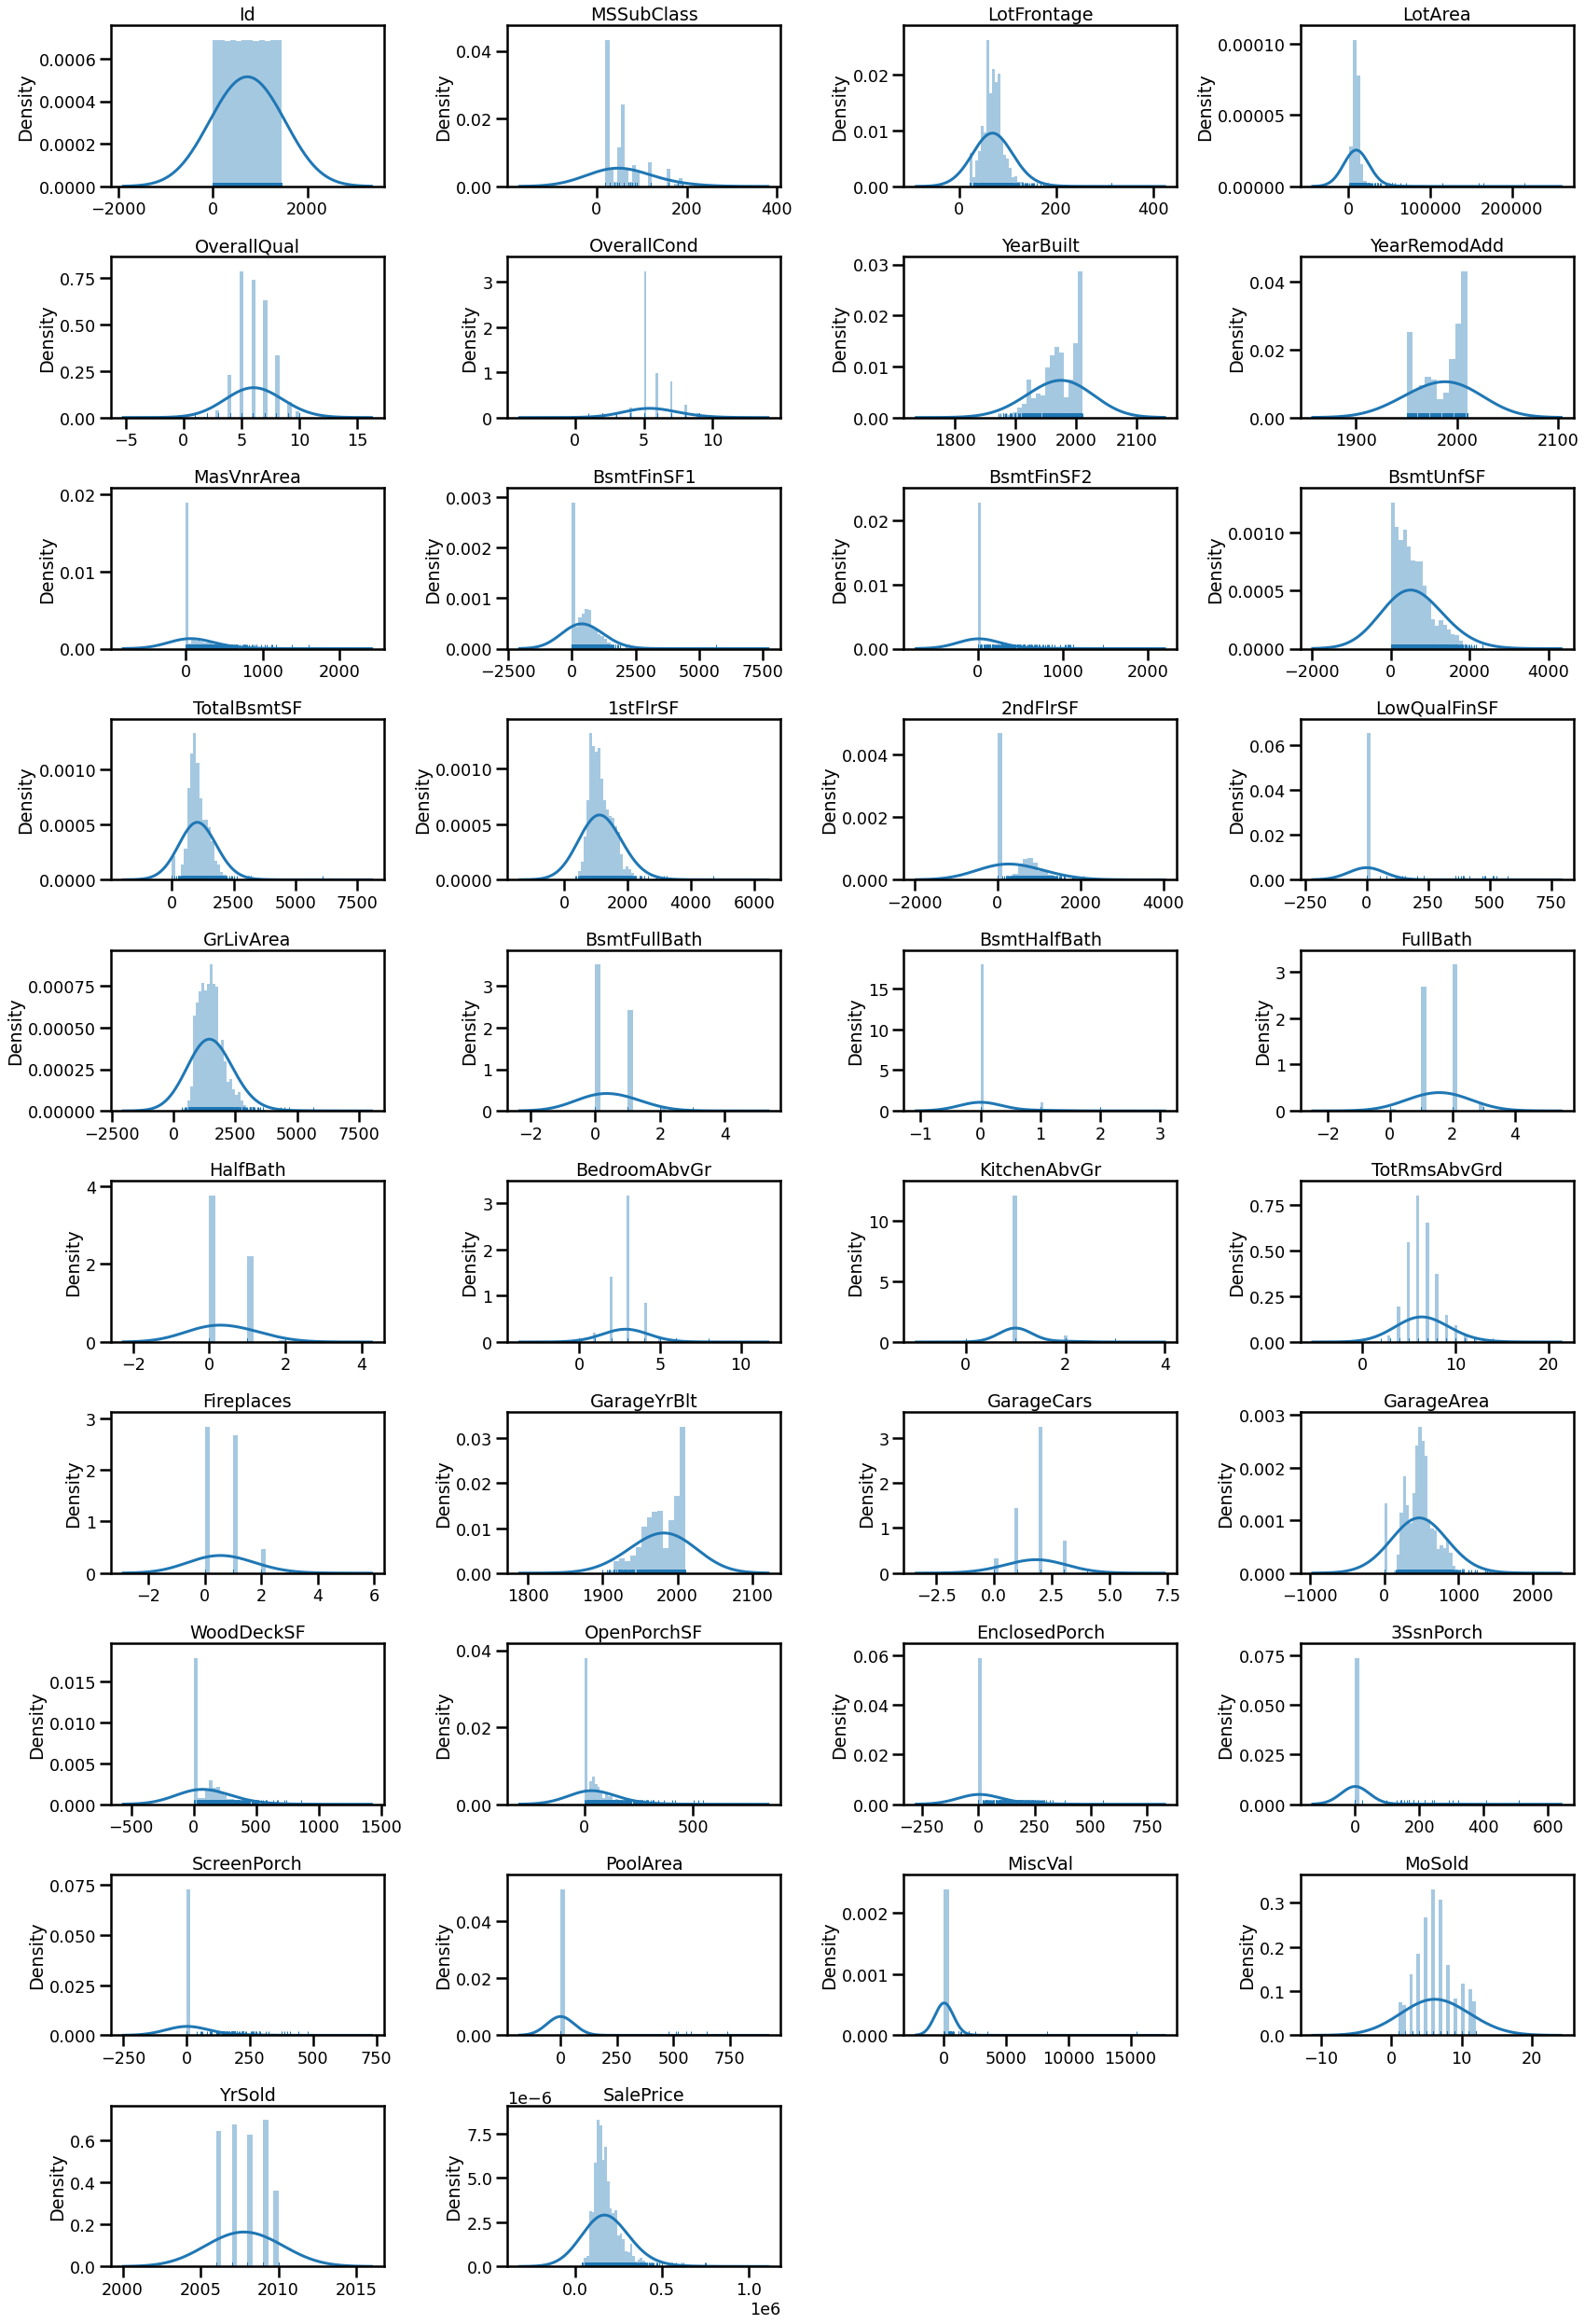

In [14]:
plotDistribution(df_house_it1_num)

Following are the main observations from the above plots
- All the numerical variables need some kind of transformation as they are nor normally distributed
- Almost all of them possess some kind of skewness which needs removal

In [15]:
# As a part of Unoivariate analysis, following function is written to plot Box Plots

def UnvrBoxPlots(df_house_it1_num):

    plt.figure(figsize=(24, 40))
    for var in df_house_it1_num:
        plt.subplot(10,4,df_house_it1_num.index(var)+1)
        #sns.distplot(df_car[[var]], hist=True, rug=True)
        sns.boxplot(data = df_house_it1[[var]])
    plt.tight_layout()
    plt.show()

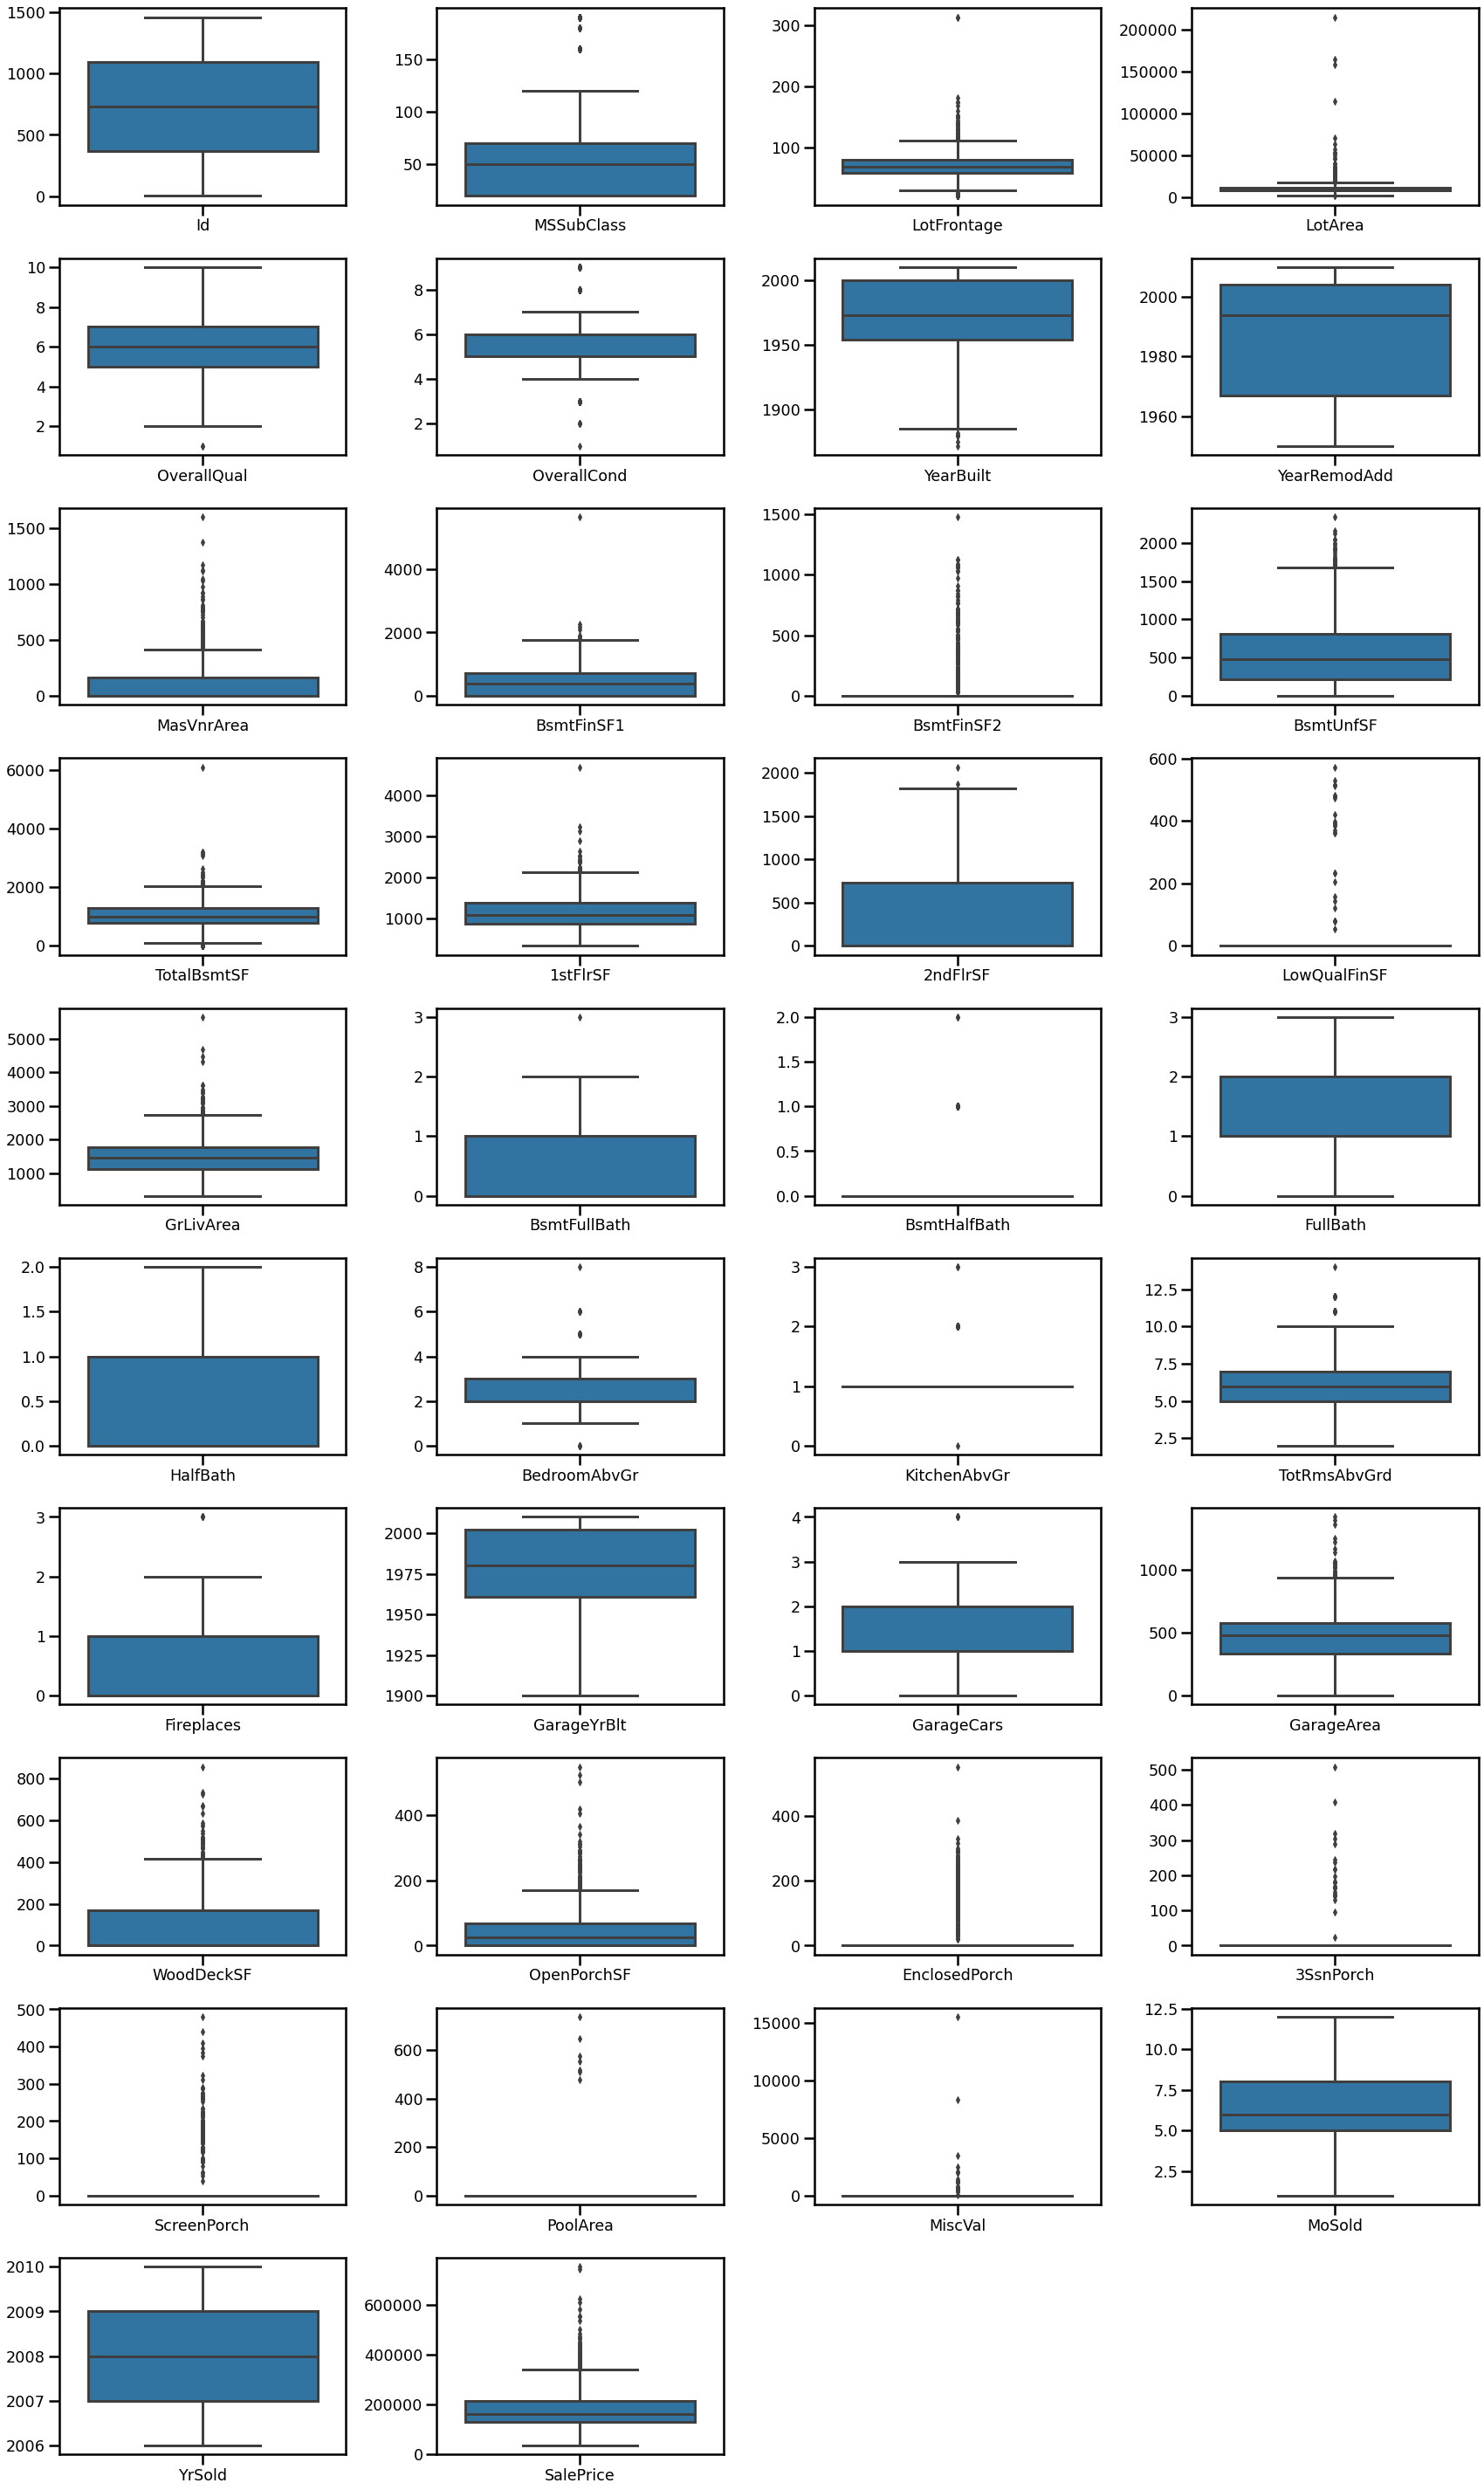

In [16]:
UnvrBoxPlots(df_house_it1_num)

Following observations can be made from these box plots
- We can see considerable number of Numerical variables which contains outliers and require outlier treatment

The following variables require outlier tretment
- "LotArea",
- "MasVnr Area",
- "BsmtFinSF1",
- "BsmtFinSF2",
- "TotalBsmtSF",
- "1stFlrSF",
- "GrLivArea",
- "GarageArea",
- "WoodDeckSF",
- "OpenPorchSF",
- "EnclosedPorch",
- "3SsnPorch",
- "ScreenPorch",
- "PoolArea",
- "MiscVal",
- "SalePrice"


In [17]:
#Function to plot categorical variables against price
def CatSalePricePlot(cat_Vars):

    plt.figure(figsize=(25, 140))
    for var in cat_Vars:
        plt.subplot(19,2,cat_Vars.index(var)+1)
        sns.boxplot(x = var, y = 'SalePrice', data = df_house_it1)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

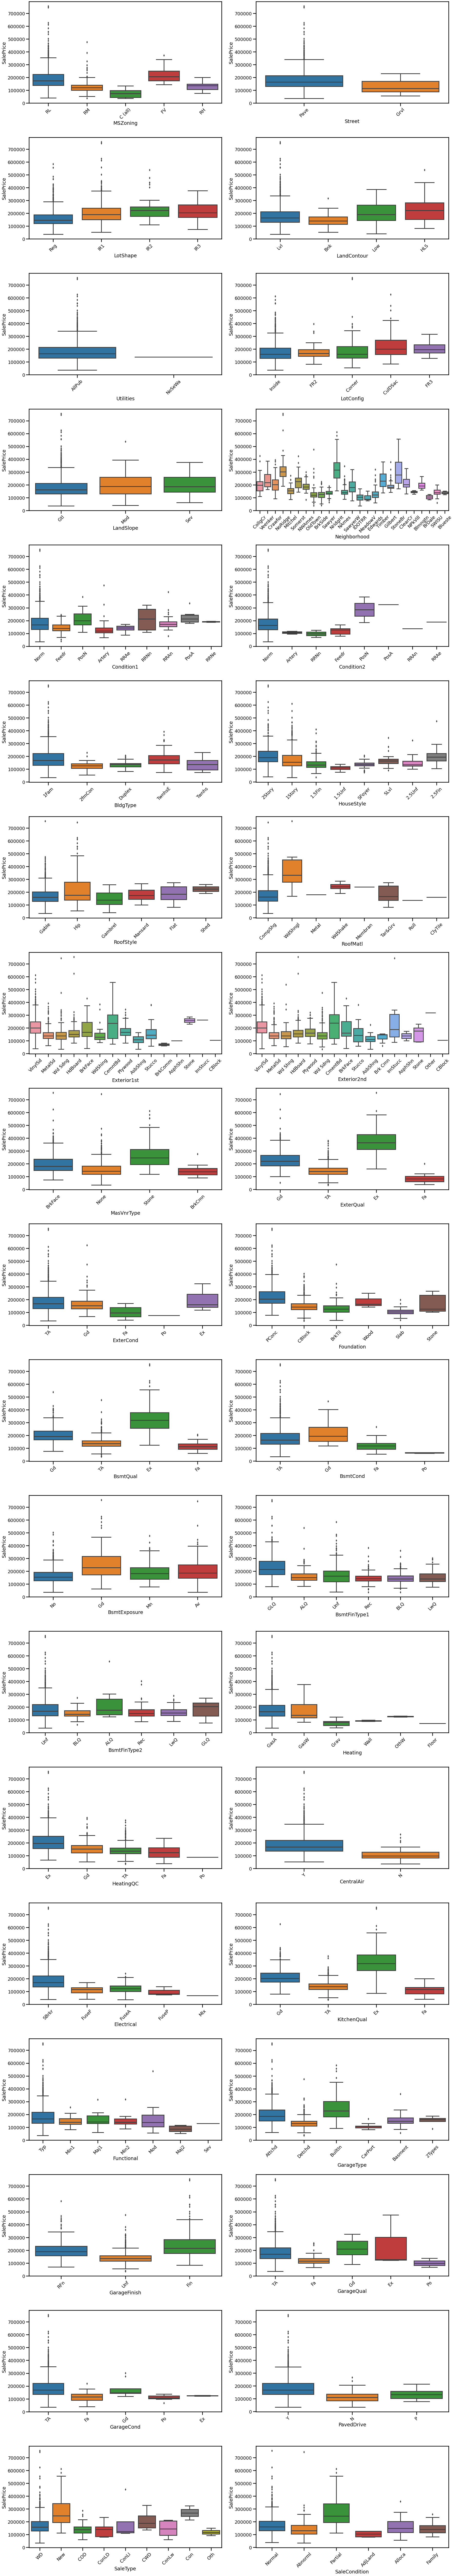

In [18]:
CatSalePricePlot(df_house_it1_charact)

Following are the key observations from the above bi- variate analysis
- FMSZoning: Identifies the general zoning classification of the sale., the mosing prices are more for RL and FV classes.For C(all) class, it's least
- Houses Paved streets command higher prices
- For LotShape: General shape of property, the sale prices  increases in the order Reg, IR1, IR2, and IR3
- LandContour: Flatness of the property, has a some effect on the house sale price, with HLS class commanding highest prices and LvI the least
- Utilities: Type of utilities available,  also has minimal effect on sales price


- For Neighborhood: Physical locations within Ames city limits, the classes Erawfor, sawyer, Edward, and Gilbert command the highest sale prices
- The sale prices vary differently based on different condition classes
- For BldgType: Type of dwelling feature, the classes 1Farm, and TwnshsE has highest prices, 2 story houses command the highest prices followed by 1 story
- Centrally airconditions houses have greater prices than the ones without it
- Good kitchen quality may attract greater sales prices
- Built-in and attached garages are additional factors for  higher sales prices

### Heat Map

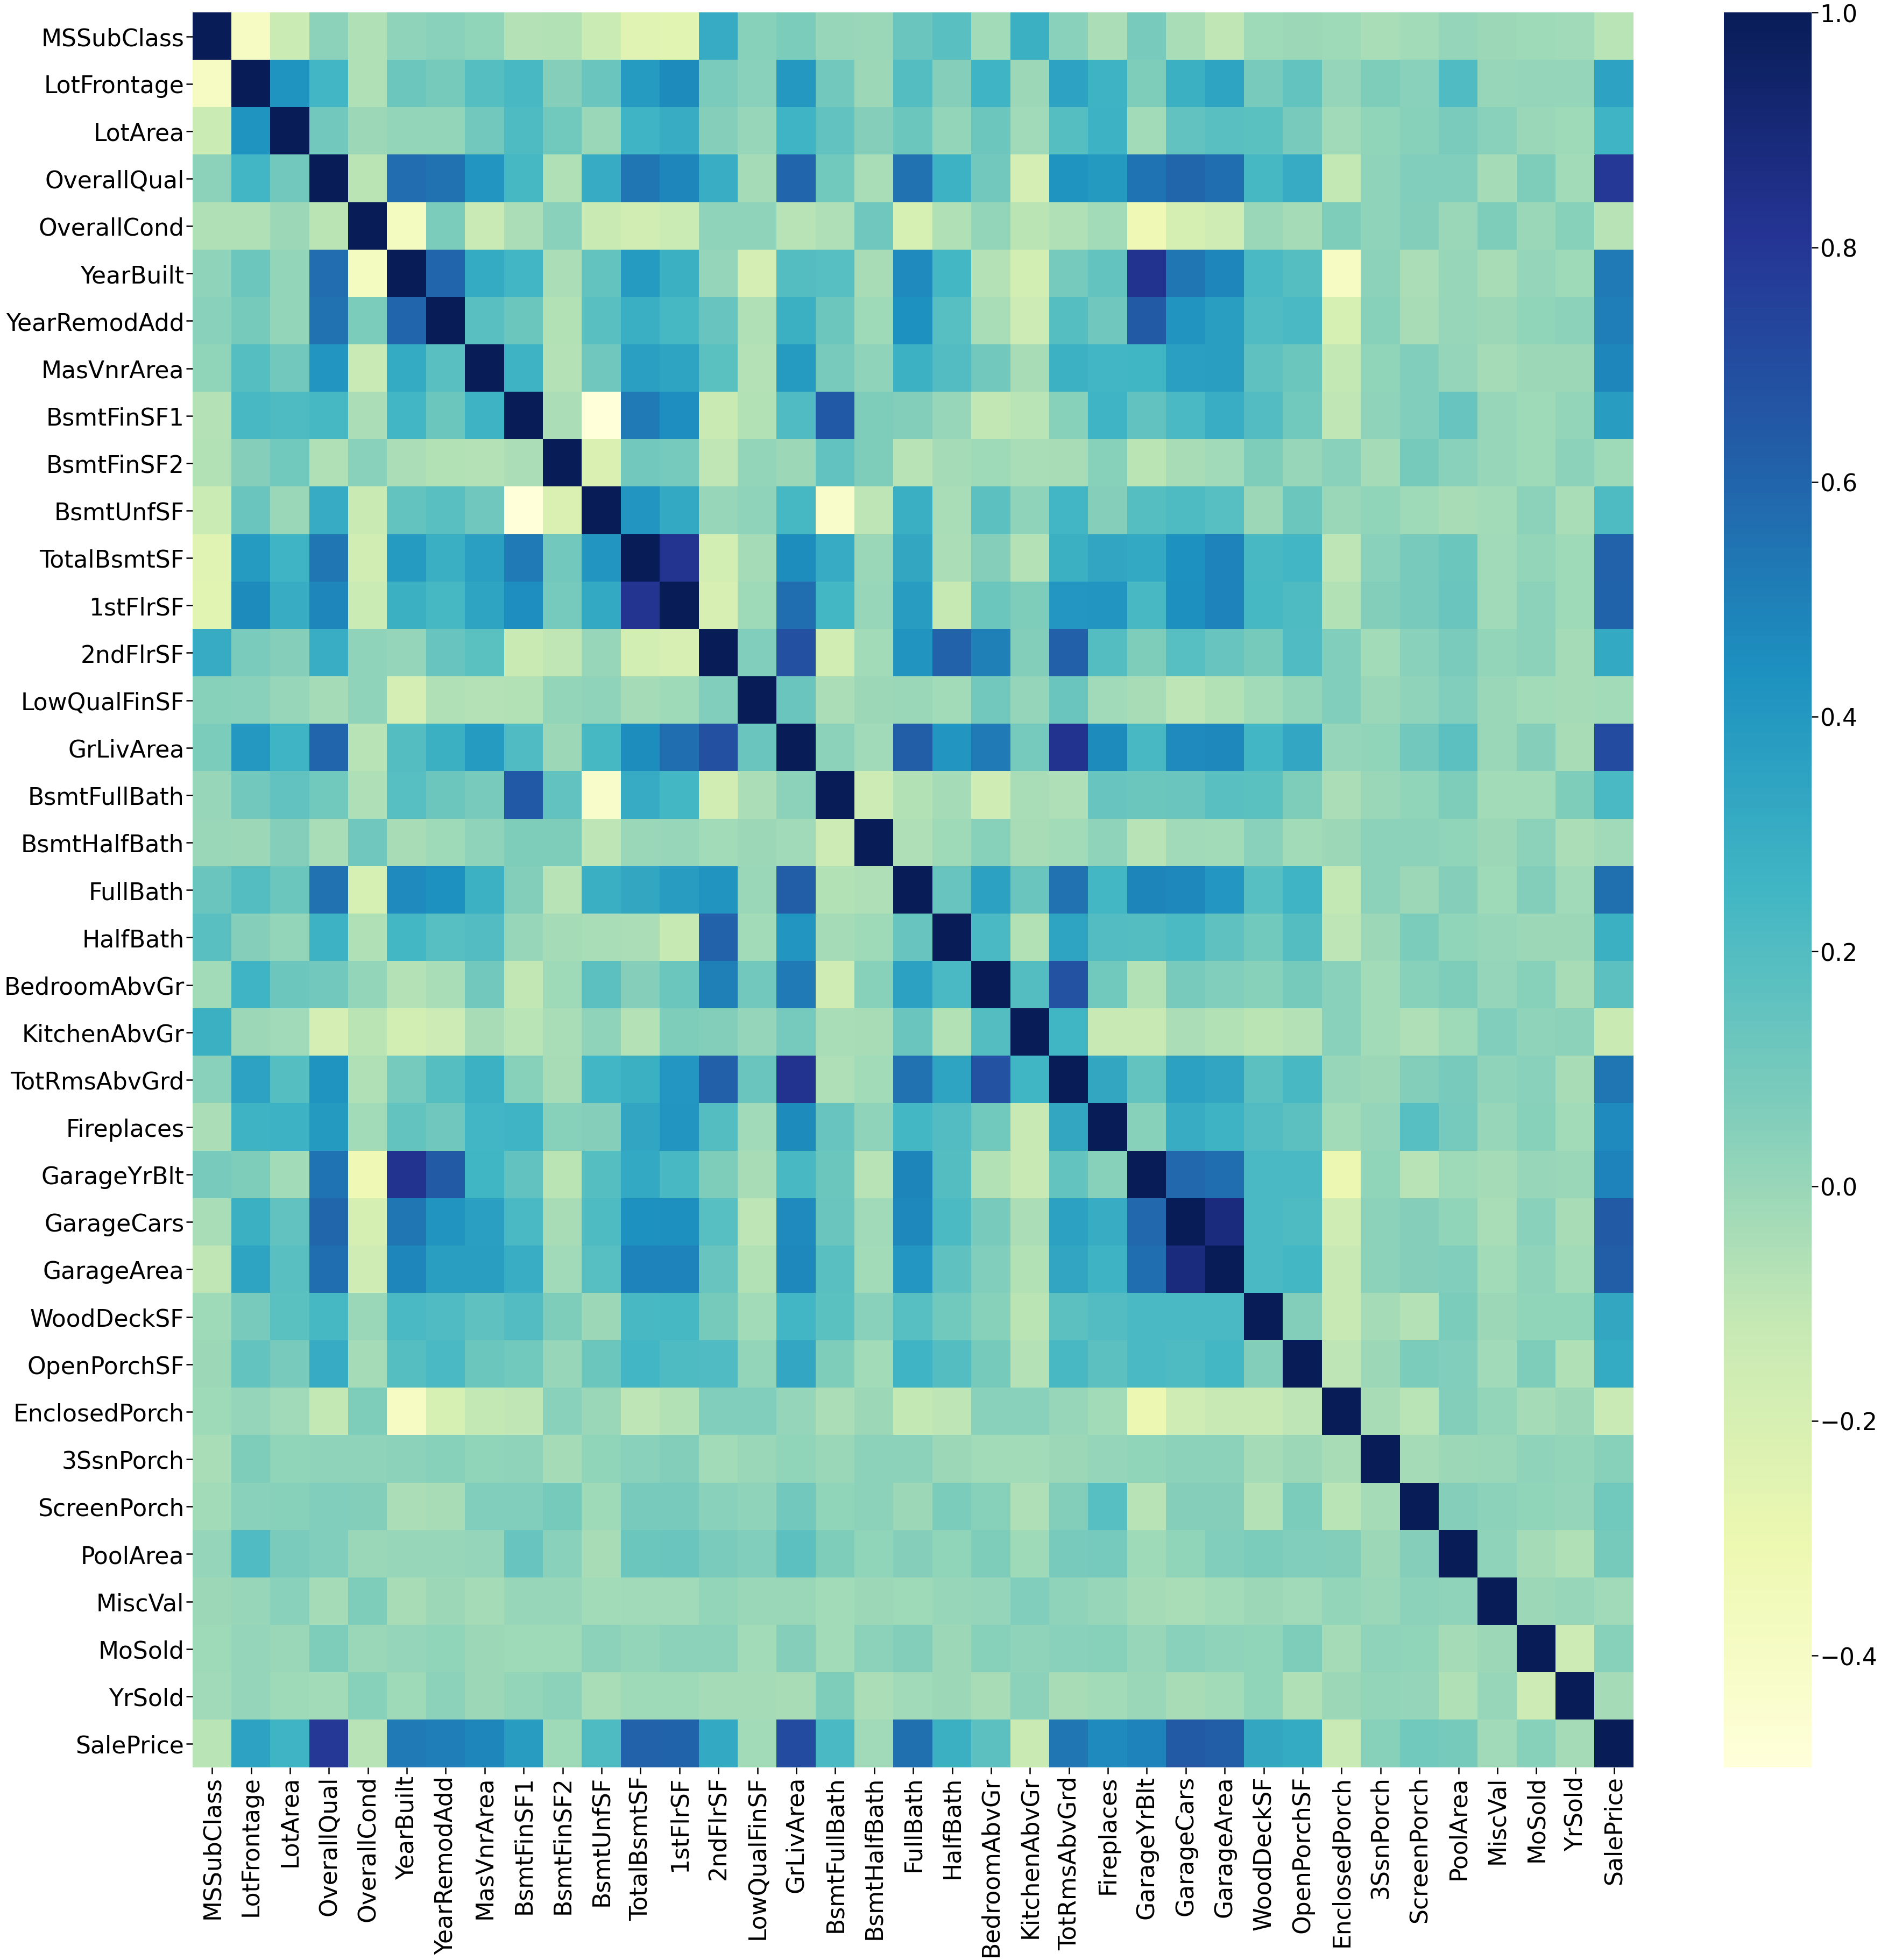

In [19]:
# examine the heat map
df_house_itration1_heatmap = df_house_it1.drop('Id',axis=1)
sns.set_context('poster',font_scale=2)
plt.figure(figsize = (60, 60))
cor=df_house_itration1_heatmap.corr()
sns.heatmap(cor, annot = False, cmap="YlGnBu")
plt.show()

- Not many features are highly correlated
- Correlated features will be removed in the features engineering section

### Segmented Univariate analysis

#### Following functions are useful for further plotting

In [20]:
# function for Average  price vs categorical variable plot
def CatVsAvgPriceplot(catVar):
    
    ax = df_house_it1.groupby(catVar)['SalePrice'].mean().sort_values(ascending=False).plot.bar()
    ax.set_title('Average House Price for'+' '+catVar)
    ax.set_ylabel('Avg. Hpuse Price') 

In [21]:
# function to plot cat char vs. price as box plots
def plotCatVsPriceBox(catVar):

    sns.boxplot(x = catVar, y = 'SalePrice', data = df_house_it1)
    plt.title("Box Plot House Price vs."+' '+catVar)
    plt.tight_layout()
    plt.show()

In [22]:
# frequency plot function

def Plotcount(catVar):
    ax = (round((df_house_it1.groupby(catVar)[catVar].count()/len(df_house_it1[catVar])*100),2)).sort_values(ascending=False).plot.bar()
    ax.set_title('Percent Count Plot for'+' '+catVar)

In [23]:
# Categorical var vs. avg. price
def SubCatVsPriceLineplot(catVar):
    
    ax = df_house_it1.groupby(catVar)['SalePrice'].mean().sort_values(ascending=False).plot()
    ax.set_title('Average Price for'+' '+catVar)
    ax.set_ylabel('Avg. House Price')  

In [24]:
# function for various categorical plots against price

def Univariatesegmented(catVar):
    sns.set_context('poster',font_scale=0.6)
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    CatVsAvgPriceplot(catVar)
    
    plt.subplot(1, 2, 2)
    #countPlot(catVar)
    plotCatVsPriceBox(catVar)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1, 2, 1)
    Plotcount(catVar)
    #doCatVsPriceBoxPlots(catVar)
    
    plt.subplot(1, 2, 2)
    SubCatVsPriceLineplot(catVar)
    
    plt.tight_layout()
    plt.show()

#### There are a large number of categorical variables. Here the variables which are critical to busniess are plotted

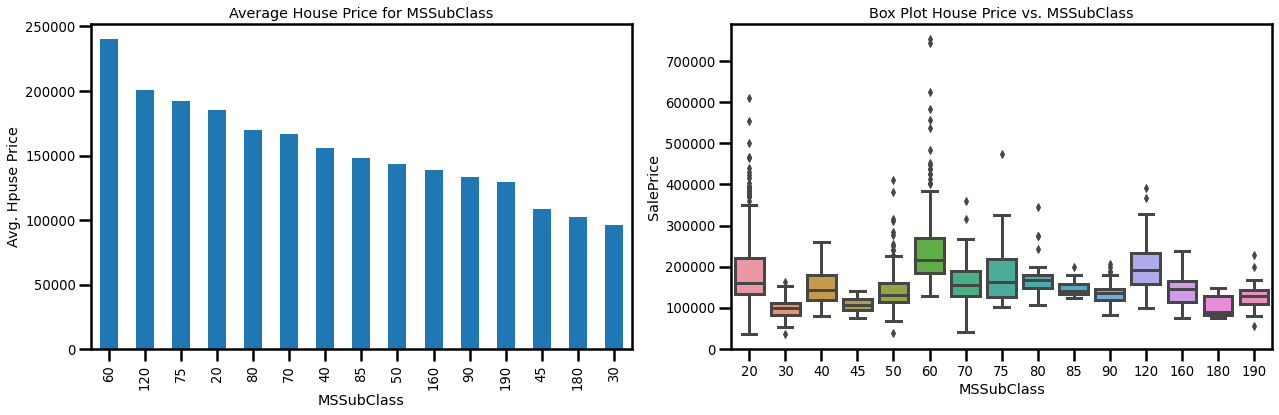

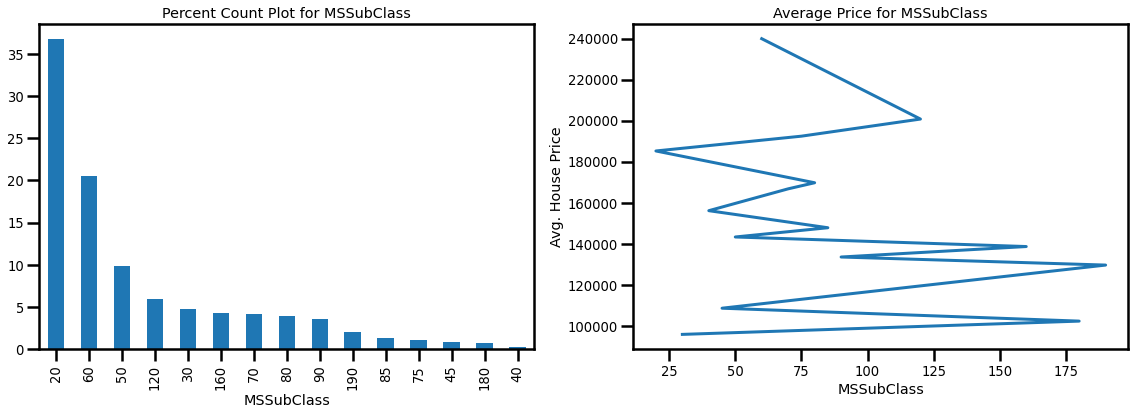

In [25]:
Univariatesegmented('MSSubClass')

- The maximum percentage is 38 % for MSsubclass 20. Next higher pecentage is for 60 and 50
- The average pris is maximum for MSsubclass subclass 60

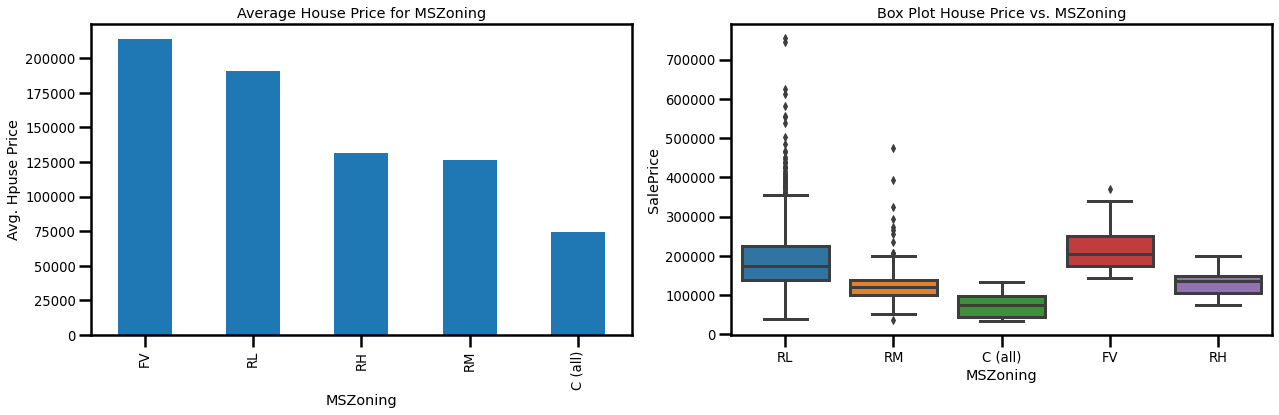

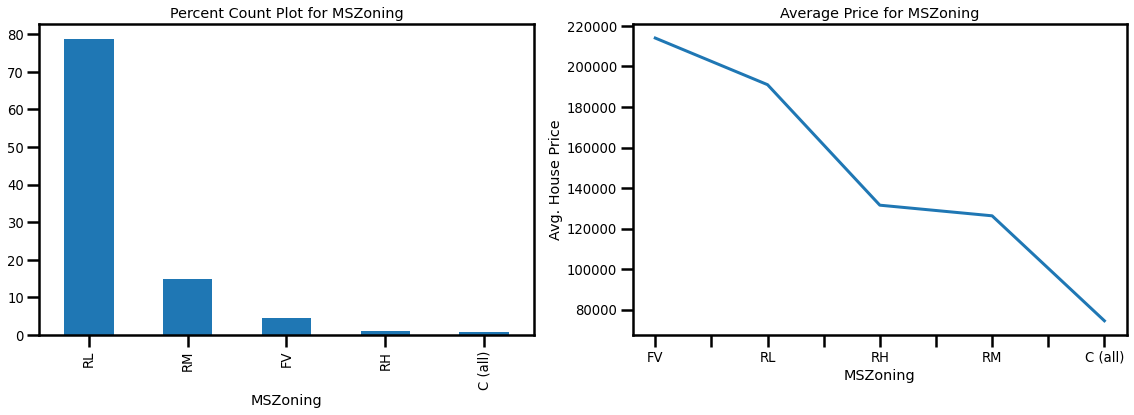

In [26]:
Univariatesegmented('MSZoning')

- The average housing price is maximum for MSZoning FV followed by RL and RH
- The pecentage count for MSZoning  RL is around 75% followed by RM and FV

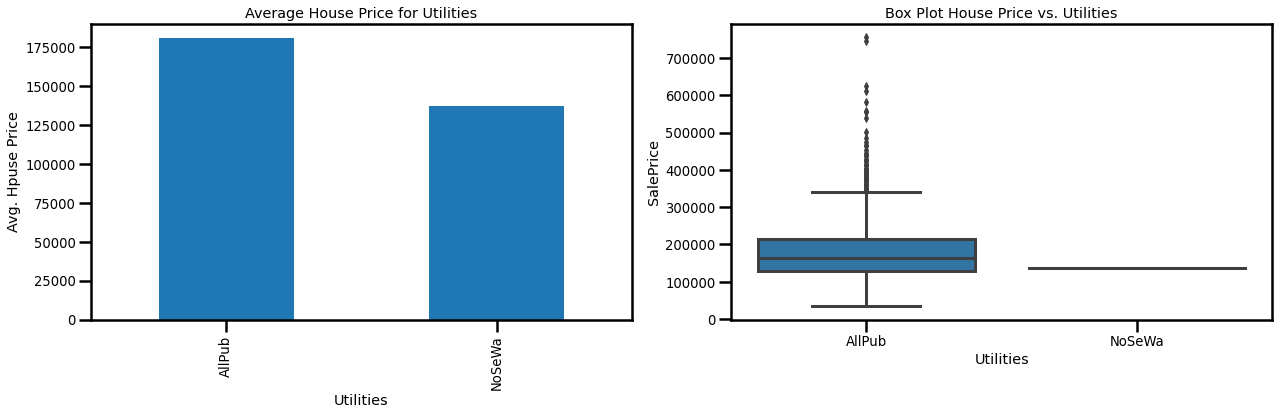

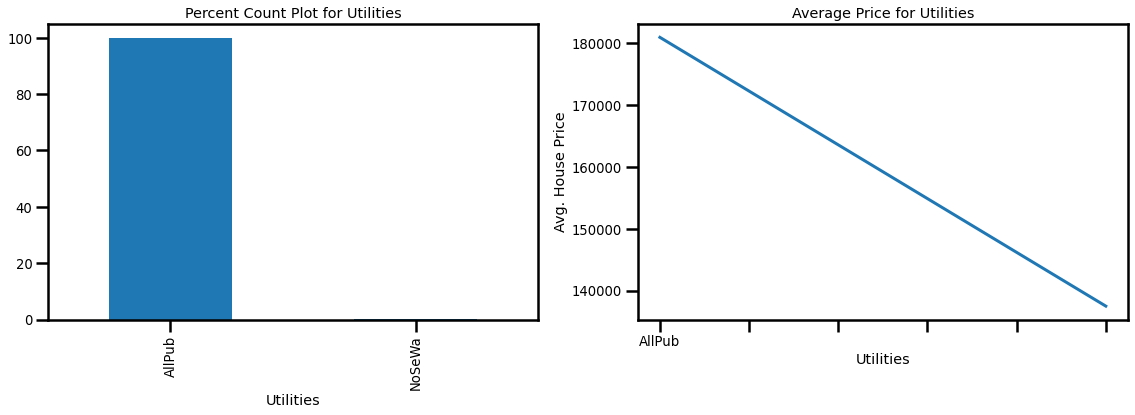

In [27]:
Univariatesegmented('Utilities')

- Average housing price for Utilities is maximum for AlPub  ( arounfd 175 000 usd)
- The pecentage count for utilities is maximum for for AlPub 

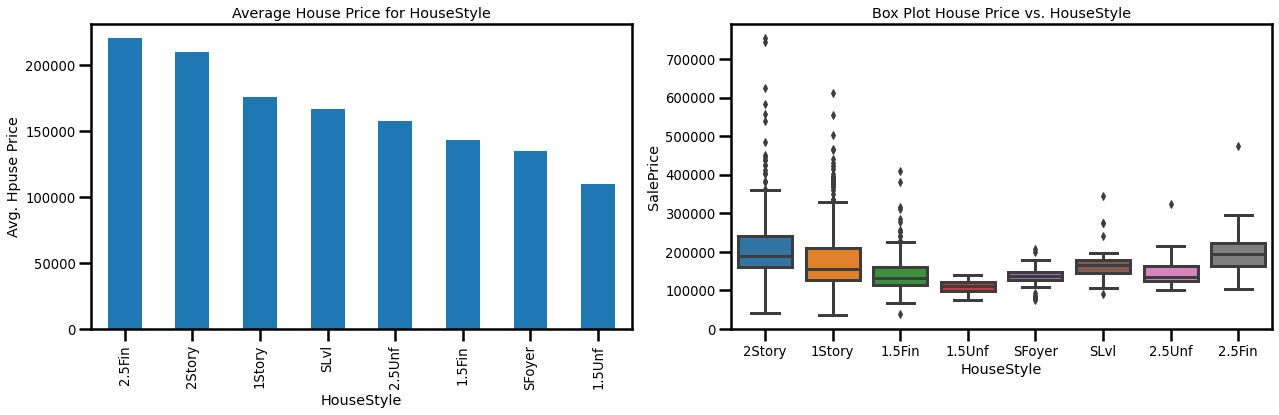

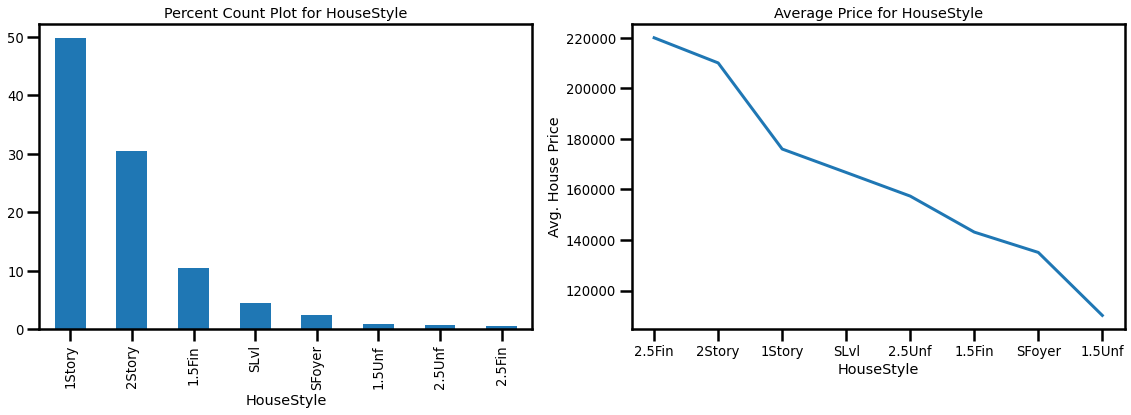

In [28]:
Univariatesegmented('HouseStyle')

- The average housing price for HousingStyle category is maximum for 25Fin 
- The maximum percentage count for Housing Style is maximum for 1story ( 50%) 

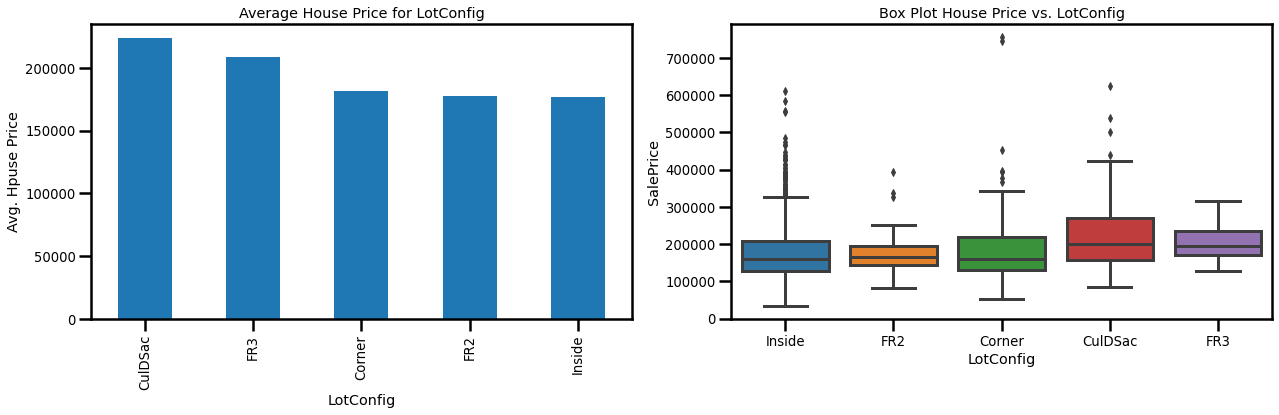

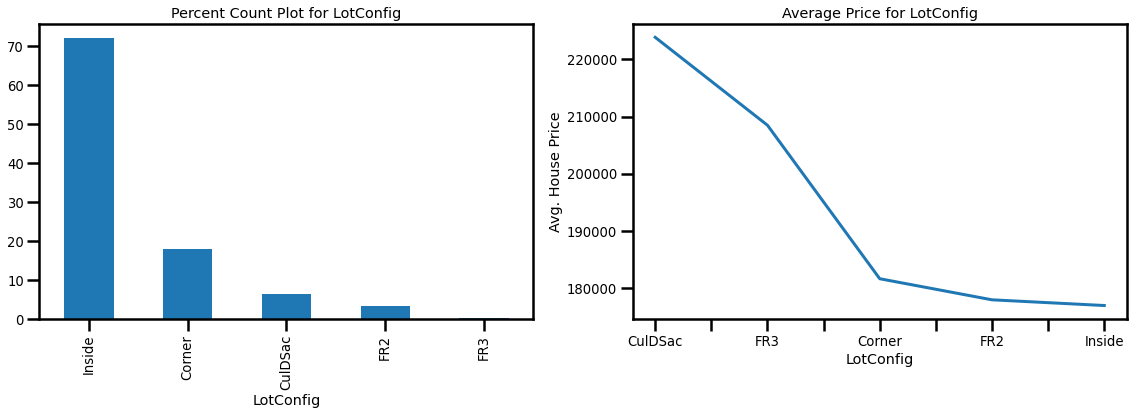

In [29]:
Univariatesegmented('LotConfig')

- Around 70% LotCongig belong to inside class
- Different LotCongig have only marginal effect on the sale prices

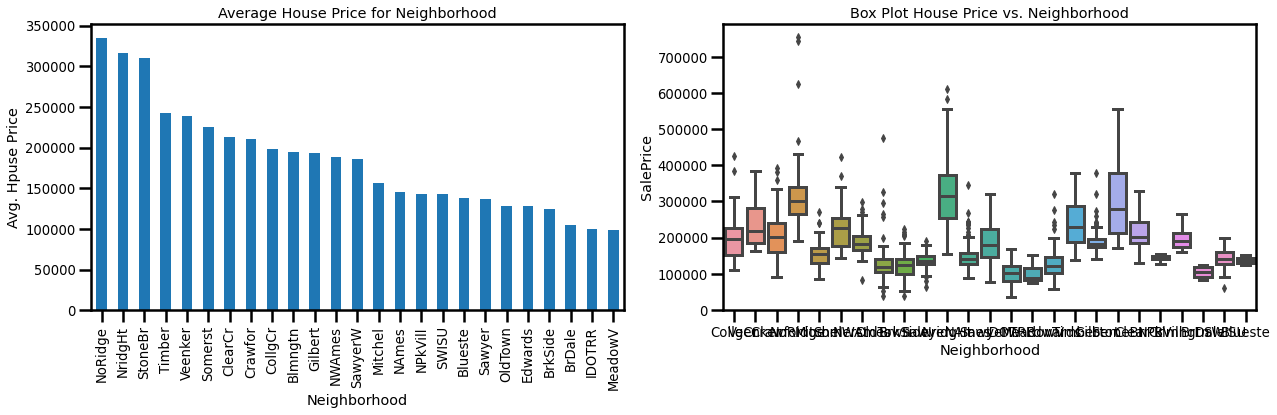

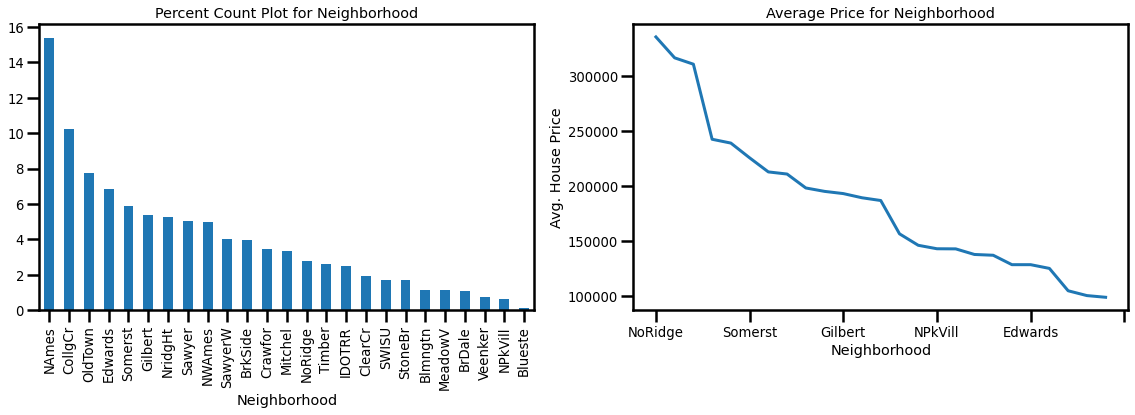

In [30]:
Univariatesegmented('Neighborhood')

- A max of 15% Neighborhood belongs to NAmes class
- NoRidge class commands the highest avg prices of USD 3,30,000

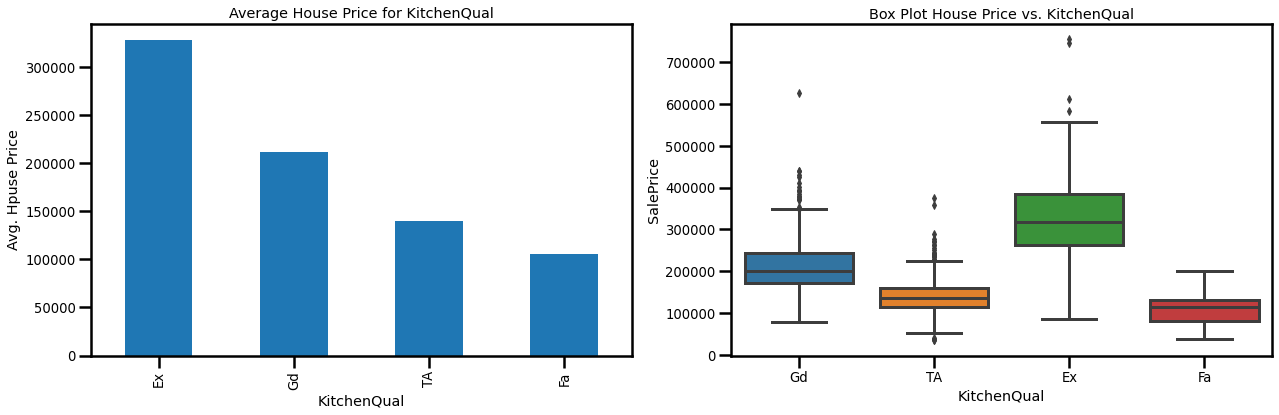

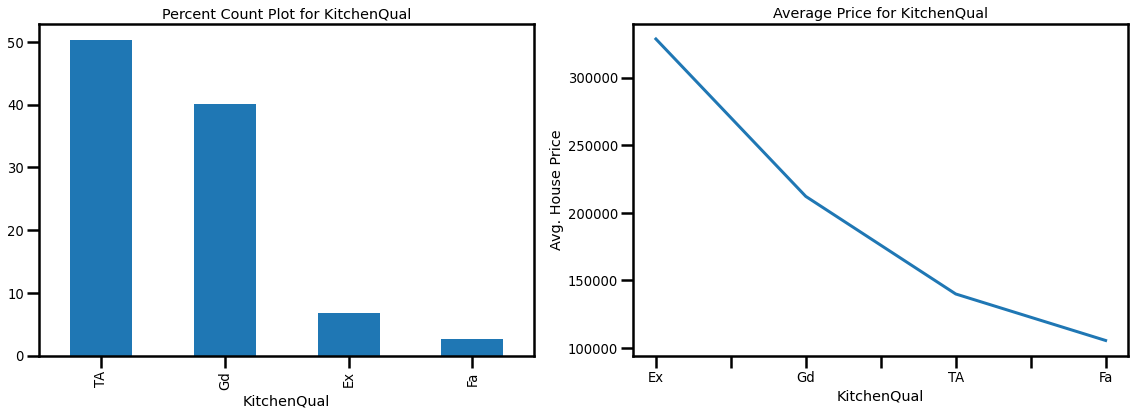

In [31]:
Univariatesegmented('KitchenQual')

- KitchenQual has class TA as max, close to 50%
- Class Ex command max prices, close to $ 3,50,000

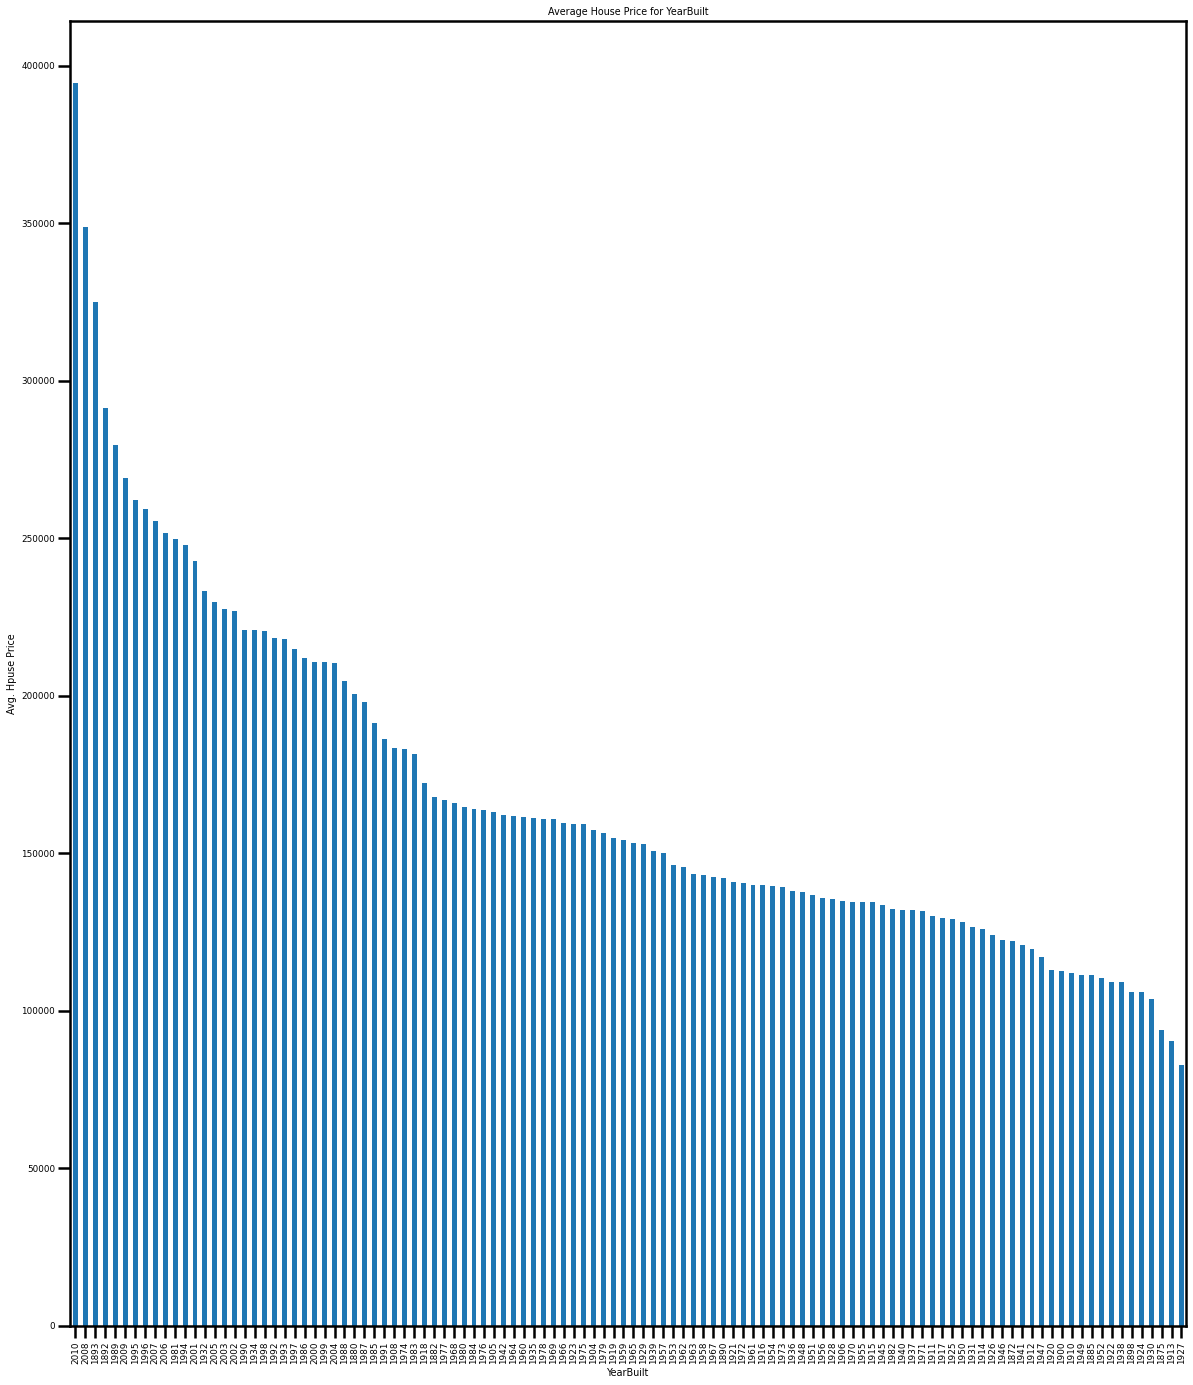

In [32]:
sns.set_context('poster',font_scale=0.4)
plt.figure(figsize=(20,24))
CatVsAvgPriceplot('YearBuilt')

- Newer houses fetches more average housing prices

### Treatment of variables with outliers 

In [33]:
# From the previous box plots following variables with outliers are identified 
outliers_features = ["LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","1stFlrSF","GrLivArea","GarageArea",
                          "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
df_house_it1.shape

(1460, 76)

In [34]:
# IQR method is followed for Removing ourliers 
for column in outliers_features:
    Quarter1 = df_house_it1[column].quantile(0.25)
    Quarter3 = df_house_it1[column].quantile(0.75)
    IQR = Quarter3-Quarter1
    df_house_it2 = df_house_it1[(df_house_it1[column] >= (Quarter1 - (1.5*IQR))) & (df_house_it1[column] <= (Quarter3+(1.5*IQR)))]

In [35]:
df_house_it2.shape # Check for dropped rows

(1399, 76)

- 61 rows of outliers are dropped

### Missing value tratment of coulms with null values

In [36]:
# Ignore warnings
import warnings
def ignore_warnings(*args, **kwargs):
    pass
warnings.warn = ignore_warnings  

In [37]:
# Missing value treatment: LotFrontage- By median value 
df_house_it2["LotFrontage"] = df_house_it2.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [38]:
# Missing value treatment: 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' etc..by None for null
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'MSSubClass','BsmtFinType2'
            ,'BsmtFinType1', 'BsmtExposure', 'BsmtCond','BsmtQual'):
    df_house_it2[col] = df_house_it2[col].fillna('None')

In [39]:
## Missing value treatment: By filling 0 for null values
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1'
            , 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    df_house_it2[col] = df_house_it2[col].fillna(0)

In [40]:
# Missing value treatment: MSZoning- By Mode value,  Most occuring value
df_house_it2['MSZoning'] = df_house_it2['MSZoning'].fillna(df_house_it2['MSZoning'].mode()[0])

In [41]:
# Missing value treatment: Functional - by typical for Null
df_house_it2["Functional"] = df_house_it2["Functional"].fillna("Typ")

In [42]:
# Missing value treatment:'Electrical'- By median value- Most occuring value

df_house_it2['Electrical'] = df_house_it2['Electrical'].fillna(df_house_it2['Electrical'].mode()[0])

In [43]:
# Missing value treatment:'Exterior1st'- By median value- Most occuring value 
df_house_it2['Exterior1st'] = df_house_it2['Exterior1st'].fillna(df_house_it2['Exterior1st'].mode()[0])
df_house_it2['Exterior2nd'] = df_house_it2['Exterior2nd'].fillna(df_house_it2['Exterior2nd'].mode()[0])
df_house_it2['KitchenQual'] = df_house_it2['KitchenQual'].fillna(df_house_it2['KitchenQual'].mode()[0])
df_house_it2['SaleType'] = df_house_it2['SaleType'].fillna(df_house_it2['SaleType'].mode()[0])

In [44]:
#Sanity check for null value
df_house_it2_na = (df_house_it2.isnull().sum() / len(df_house_it2)) * 100
df_house_it2_na = df_house_it2_na.drop(df_house_it2_na[df_house_it2_na == 0].index).sort_values(ascending=False)
df_house_it2_missing_data = pd.DataFrame({'Missing Ratio' :df_house_it2_na})
df_house_it2_missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

- from the above check, it is confirmed that there is no missing value in all the variable columns

#### Feature Engineering

- Still some features in the database are integers but they are categorical variables
- Removal of constant features from the database
- Removal of duplicate rows from the database
- Removal of Quasi- constant features
- Removal of duplicate features
- Removal of correlated features


#### Removal of constant features

In [45]:
variable_constant = [
    var for var in df_house_it2[df_house_it1_num].columns if df_house_it2[var].std() == 0
]
variable_constant 

[]

- There are no features ( variables ) in database with constant features ( zero std deviation) 

#### Check for features with low variance ( Quasi- constant)

In [47]:
# 0.1 shows 99% of rows approximately
from sklearn.feature_selection import VarianceThreshold
selle = VarianceThreshold(
    threshold=0.01)  

selle.fit(df_house_it2[df_house_it1_num])  # the fit function finds colums with low variance
print('Total number iof numeric featutes',df_house_it2[df_house_it1_num].shape)
print('Number of features NOT quasi-constant ',sum(selle.get_support())) # Low- variance not present

Total number iof numeric featutes (1399, 38)
Number of features NOT quasi-constant  38


- No colums have Quasi- constant features

#### Check for duplicate features

In [48]:
same_feature = []
for i in range(0, len(df_house_it2.columns)):
    if i % 10 == 0:  
        column_1 = df_house_it2.columns[i]

    for column_2 in df_house_it2.columns[i + 1:]:
        if df_house_it2[column_1].equals(df_house_it2[column_2]):
            same_feature.append(column_2)
            
len(same_feature) 


0

- Length of duplicate feature is zero, so no duplicate features

#### Determination and elimination of correlated features

In [49]:
def feat_correlation(dataset, threshold):
    column_correlation = set()  #  Names of correlated columns are set in this variables
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs( correlation_matrix.iloc[i, j]) > threshold: # absolute coeffient values are stored
                column_name= correlation_matrix .columns[i]  #  name of columns are identified
                column_correlation.add(column_name)
    return column_correlation

In [50]:
correlated_variables = feat_correlation(df_house_it2, 0.8) # 0.8 value is set for correlation coeffiecient
print('correlated_variables: ', len(set(correlated_variables)) )
print(correlated_variables)

correlated_variables:  2
{'GarageArea', 'TotRmsAbvGrd'}


In [51]:
df_house_it2.drop(labels=correlated_variables, axis=1, inplace=True)

In [52]:
df_house_it2.shape # Sanity check

(1399, 74)

#### creation of some derived features

In [53]:
df_house_it2['MSSubClass'] = df_house_it2['MSSubClass'].apply(str)
df_house_it2['OverallCond'] = df_house_it2['OverallCond'].astype(str)
df_house_it2.shape # final check

(1399, 74)

In [54]:
#converting year to number of years
df_house_it2['YearsBuiltAge'] = 2022 - df_house_it2['YearBuilt']
df_house_it2['YearsRemodAddAge'] = 2022 - df_house_it2['YearRemodAdd']
df_house_it2['GarageYrBltAge'] = 2022 - df_house_it2['GarageYrBlt']
df_house_it2['YrsSoldAge'] = 2022 - df_house_it2['YrSold']

In [55]:
df_house_it2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1399 non-null   int64  
 1   MSSubClass        1399 non-null   object 
 2   MSZoning          1399 non-null   object 
 3   LotFrontage       1399 non-null   float64
 4   LotArea           1399 non-null   int64  
 5   Street            1399 non-null   object 
 6   LotShape          1399 non-null   object 
 7   LandContour       1399 non-null   object 
 8   Utilities         1399 non-null   object 
 9   LotConfig         1399 non-null   object 
 10  LandSlope         1399 non-null   object 
 11  Neighborhood      1399 non-null   object 
 12  Condition1        1399 non-null   object 
 13  Condition2        1399 non-null   object 
 14  BldgType          1399 non-null   object 
 15  HouseStyle        1399 non-null   object 
 16  OverallQual       1399 non-null   int64  


In [56]:
# Dropping YrSold and MoSold variables as already this info is extracted and have too many classes
df_house_it2 = df_house_it2.drop(['YrSold','MoSold'], axis =1 )
df_house_it2.shape # check

(1399, 76)

In [57]:
# Derived feature- Total Square feet = TotalBsmtSF' + '1stFlrSF' + '2ndFlrSF'
df_house_it2['tot_sq_ft'] = df_house_it2['TotalBsmtSF'] + df_house_it2['1stFlrSF'] + df_house_it2['2ndFlrSF']
df_house_it2.shape # check

(1399, 77)

In [58]:
# numerical  variables are seperated into different variable
final_numerical_variables = df_house_it2.dtypes[df_house_it2.dtypes != "object"].index

In [59]:
len(final_numerical_variables) # senity check

37

- There are now 37 numerical variables

In [60]:
# Categorical  variables are seperated into different variable
df_house_it2_categorical = df_house_it2.select_dtypes(include=['object'])
df_house_it2_categorical.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... Electrical KitchenQual Functional  \
0       Gtl      CollgCr       Norm  ...      SBrkr          Gd        Typ   
1       Gtl      Veenker      Feedr  ...      SBrkr          TA        Typ   
2       Gtl      CollgCr       Norm  ...      SBrkr          Gd        Typ   
3       Gtl      Crawfor       Norm  ...      SBrkr          Gd        Typ   
4       Gtl      NoRidge       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 40 columns]

In [61]:
#  dummies for categorical variables
df_house_dummies = pd.get_dummies(df_house_it2_categorical) 
print(df_house_dummies.shape)
df_house_dummies.head()

(1399, 267)


MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  ...  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0              1  ...               0             0             0   
1              0  ...               0             0             0   
2              1  ...               0             0             0   
3              0  ...               0             0             0   
4              1  ...               0             0             0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1                      0                      0   
1            1                      0                      0   
2            1                      0                      0   
3            1                      1                      0   
4            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 267 columns]

In [62]:
df_house_it3 = df_house_it2.copy() # a copy is made for df_house_it2 for future usage
df_house_it3.shape

(1399, 77)

In [63]:
df_house_dummies.isnull().sum() # check for null values

MSSubClass_120           0
MSSubClass_160           0
MSSubClass_180           0
MSSubClass_190           0
MSSubClass_20            0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 267, dtype: int64

In [64]:
# Now as the dummy variables are already available, the original columns of categorical variables can be dropped
df_house_it3 = df_house_it3.drop(list(df_house_it2_categorical.columns), axis=1)
df_house_it3.shape

(1399, 37)

#### Skewness check

In [65]:
from scipy import stats   # requried libraries are imported
from scipy.stats import norm, skew 

In [66]:
# Skewed variables are seperated as follows:

df_house_skewed_variables = df_house_it3.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [67]:
df_house_skewness = pd.DataFrame({'Skew' :df_house_skewed_variables})
df_house_skewness.head()

Skew
MiscVal       23.936225
PoolArea      15.735608
LotArea       11.160722
3SsnPorch     10.698809
LowQualFinSF   8.992637

#### Skew Features Treatment by BoxCox transformation (boxcox1p) 

The following reasons are used for considering boxcox1p for skewed features transformation
- We have many zeros in many colums
- Plain BoxCox uses log scale so zero values in features can noit be handled 
- so 1+x is to be used in features columns so boxcox1p is used in boxcox1p skew feature transformation

In [68]:
from scipy.special import boxcox1p # required  skew transformation library

In [69]:
df_house_skewness = df_house_skewness[abs(df_house_skewness) > 0.70]
print("We choose {} skewed numerical variables for boxcox1p transform".format(df_house_skewness.shape[0]))
df_house_skewed_variables = df_house_skewness.index
lamda = 0.15
for feature in df_house_skewed_variables:
    df_house_it3[feature] = boxcox1p(df_house_it3[feature], lamda)

We choose 37 skewed numerical variables for boxcox1p transform


In [70]:
df_house_it3.shape #  check

(1399, 37)

#### Plot histograms for transformed numerical variables

In [71]:
df_house_it3_num = list(df_house_it3.columns) # List transformed columns

In [72]:
df_house_it3_num

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'YearsBuiltAge',
 'YearsRemodAddAge',
 'GarageYrBltAge',
 'YrsSoldAge',
 'tot_sq_ft']

In [73]:
# plot histograms  

def DistributionTransfoemedPlot(df_house_it3):

    plt.figure(figsize=(50, 70))
    for var in df_house_it3:
        plt.subplot(10,4,df_house_it3_num.index(var)+1)
        ax = sns.distplot(df_house_it3[[var]], hist=True, rug=True,  kde_kws={'bw': 1.5})
        plt.title(var)
    plt.tight_layout()
    plt.show()

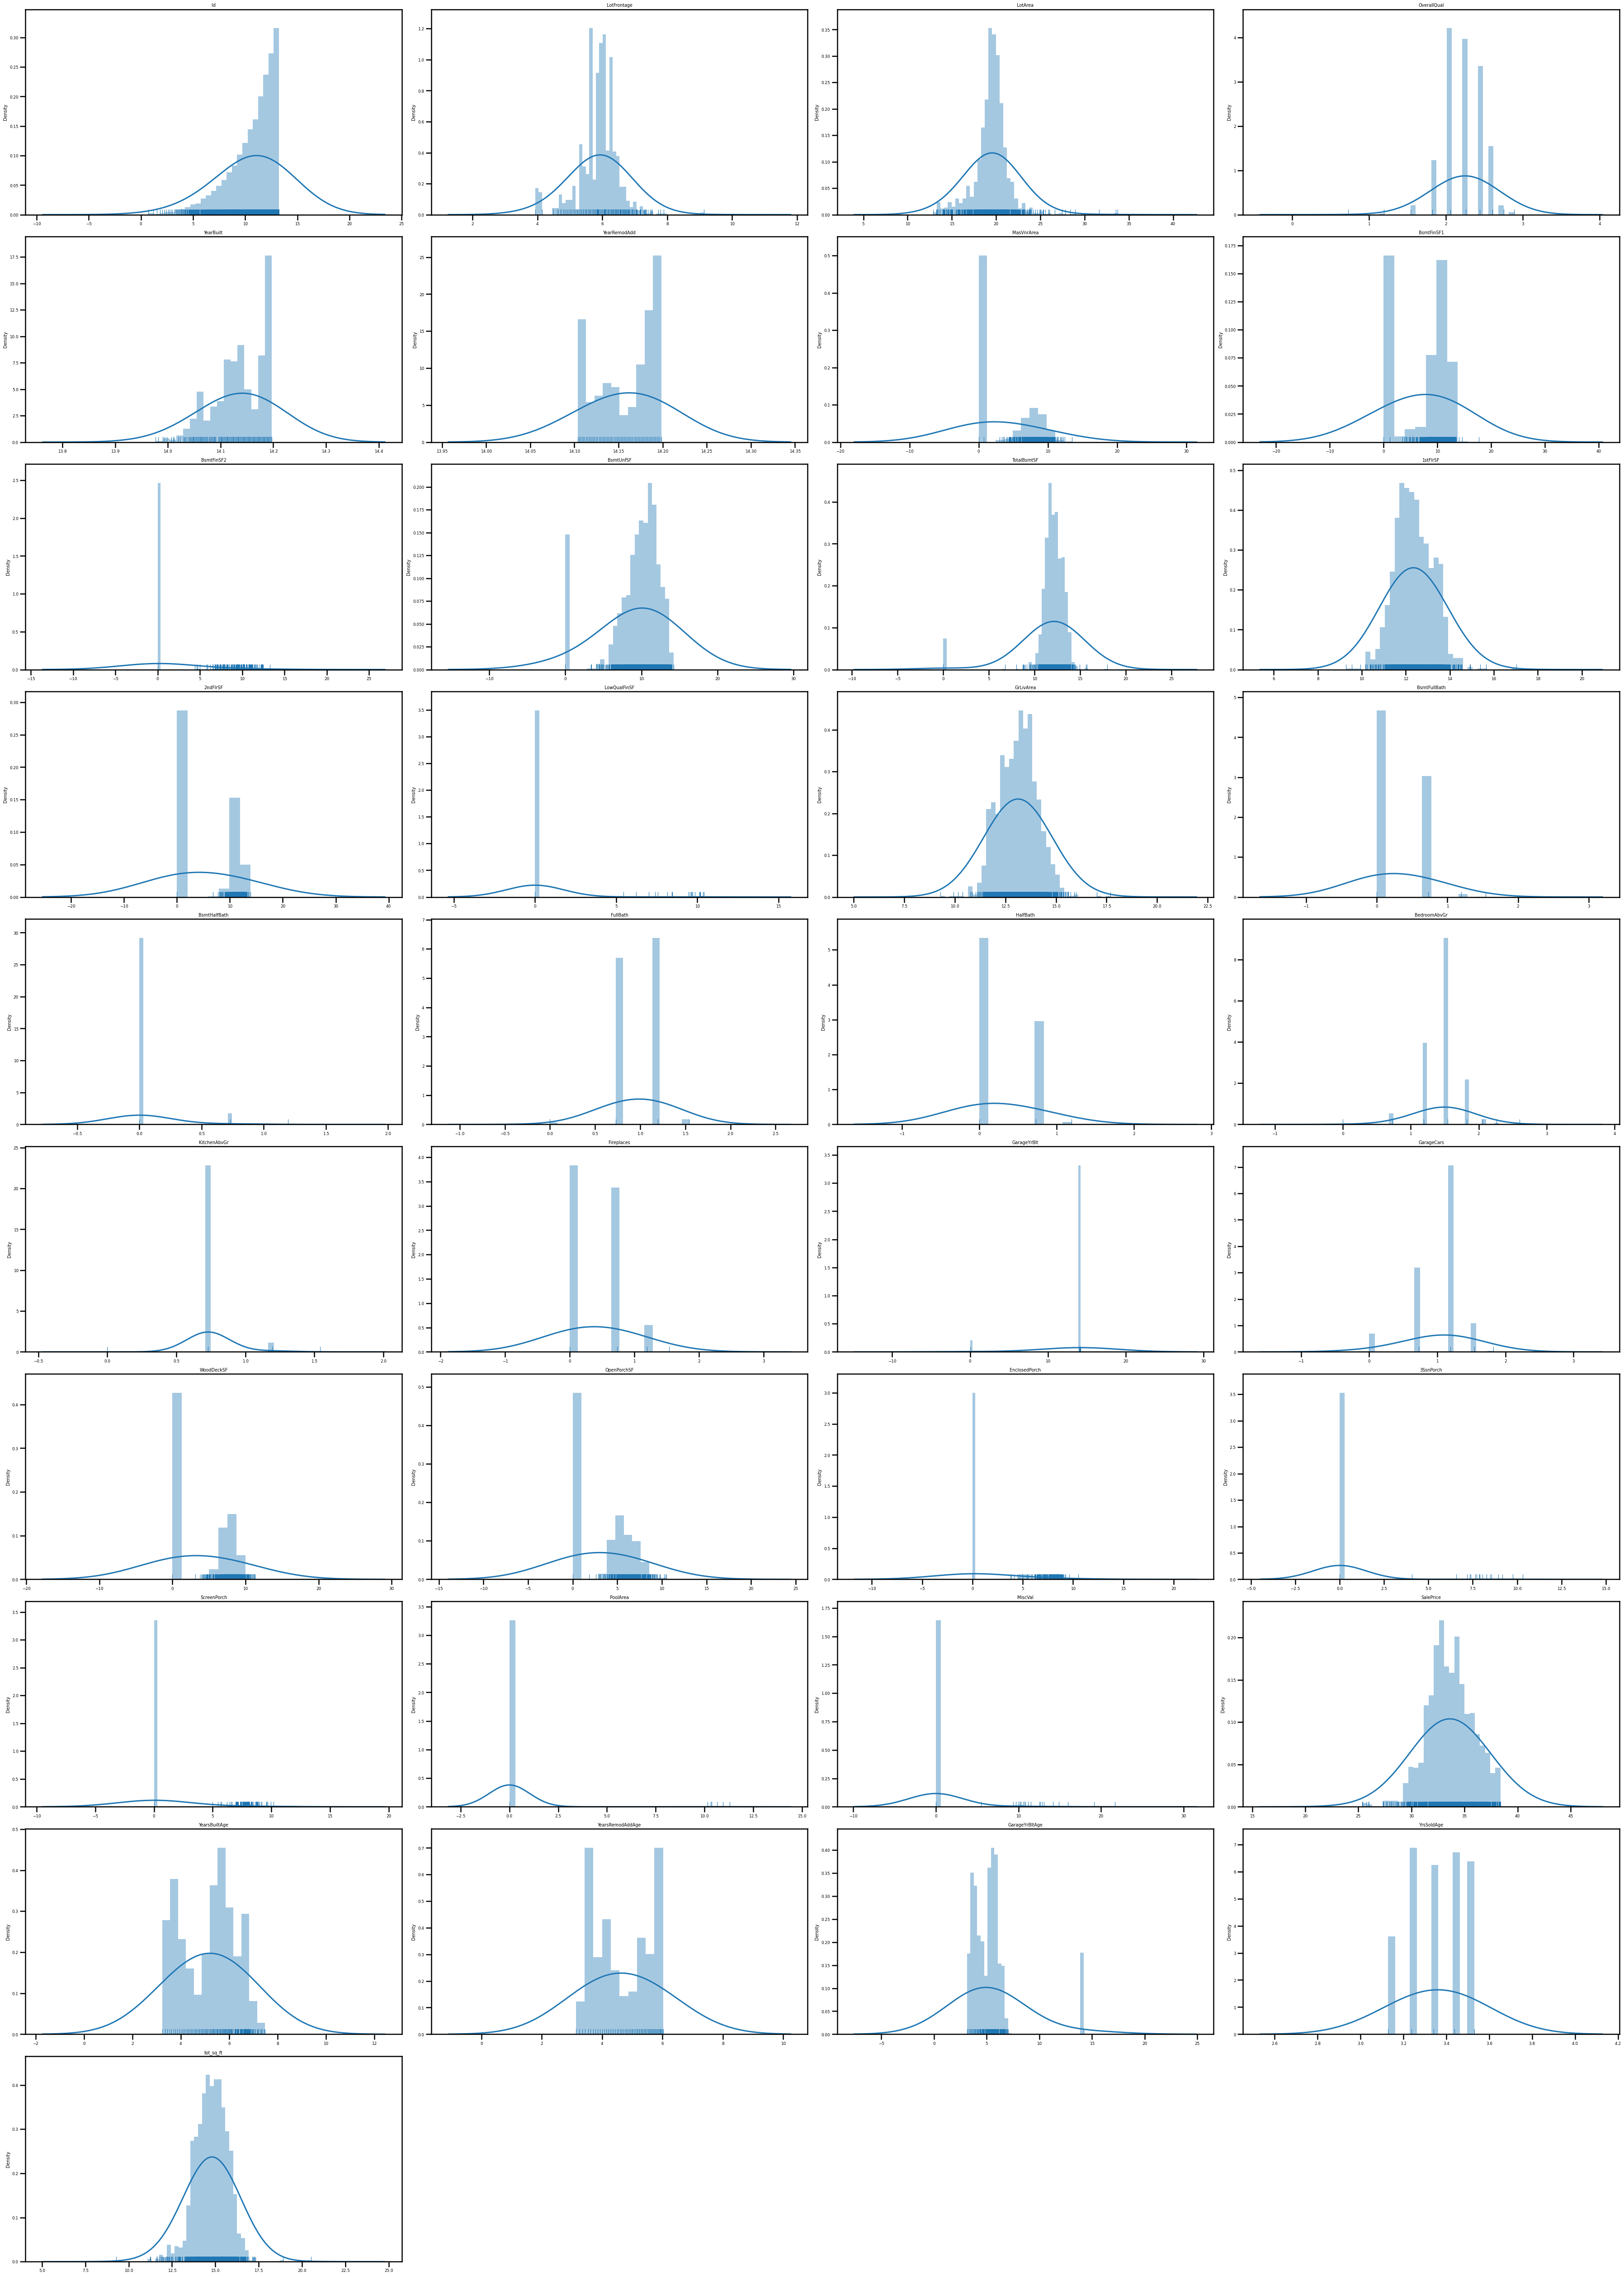

In [74]:
DistributionTransfoemedPlot(df_house_it3)

- The above transformation is improved than original one
- For some transformations, more treatment can be performed but let us proceed with this for now.

#### Concating these transformed variables with categorical dummy variables created earlierm

In [75]:
df_house_it3.reset_index(drop=True, inplace=True)
df_house_dummies.reset_index(drop=True, inplace=True)

In [76]:
# concat dummies data set with nuimeric features dataset
df_house_it4 = pd.concat([df_house_it3, df_house_dummies], axis=1)

In [77]:
df_house_it4.shape

(1399, 304)

In [78]:
df_house_it4.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 304, dtype: int64

- No null element in any columns

In [79]:
df_house_it4.head()

Id  LotFrontage    LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0  0.730463     5.831328  19.212182     2.440268  14.187527     14.187527   
1  1.194318     6.221214  19.712205     2.259674  14.145138     14.145138   
2  1.540963     5.914940  20.347241     2.440268  14.184404     14.185966   
3  1.820334     5.684507  19.691553     2.440268  14.047529     14.135652   
4  2.055642     6.314735  21.325160     2.602594  14.182841     14.182841   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0    8.059126   11.170327         0.0   7.483296  ...               0   
1    0.000000   12.062832         0.0   8.897844  ...               0   
2    7.646538   10.200343         0.0   9.917060  ...               0   
3    0.000000    8.274266         0.0  10.468500  ...               0   
4    9.391827   10.971129         0.0  10.221051  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 304 columns]

#### Bivariate Analysis - Pair plots

In [80]:
lst = []
master_lst = []
df_house_itr3_numeric_itr3 = df_house_it3[1:]
for var in df_house_itr3_numeric_itr3:

        lst.append(var)
        if (len(lst)==4):
            #print(lst)
            master_lst.append(lst)
            lst = []

In [81]:
master_lst

[['Id', 'LotFrontage', 'LotArea', 'OverallQual'],
 ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'],
 ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'],
 ['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath'],
 ['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr'],
 ['KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars'],
 ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'],
 ['ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
 ['YearsBuiltAge', 'YearsRemodAddAge', 'GarageYrBltAge', 'YrsSoldAge']]

In [82]:
master_list1 =[['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'SalePrice'],
 ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'SalePrice'],
 ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'SalePrice'],
 ['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'SalePrice'],
 ['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice'],
 ['KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'SalePrice'],
 ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'SalePrice'],
 ['ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
 ['YearsBuiltAge',
  'YearsRemodAddAge',
  'GarageYrBltAge',
  'YrsSoldAge',
  'SalePrice']]


In [83]:
import seaborn
import matplotlib.pyplot as plt

def doPairPlots(df_house_numeric):

    plt.figure(figsize=(50, 60))
    sns.set(font_scale=2)
    g=seaborn.pairplot(df_house_it3[df_house_numeric])
    g.fig.set_figheight(20)
    g.fig.set_figwidth(20)
    plt.tight_layout()
    plt.show()

<Figure size 3600x4320 with 0 Axes>

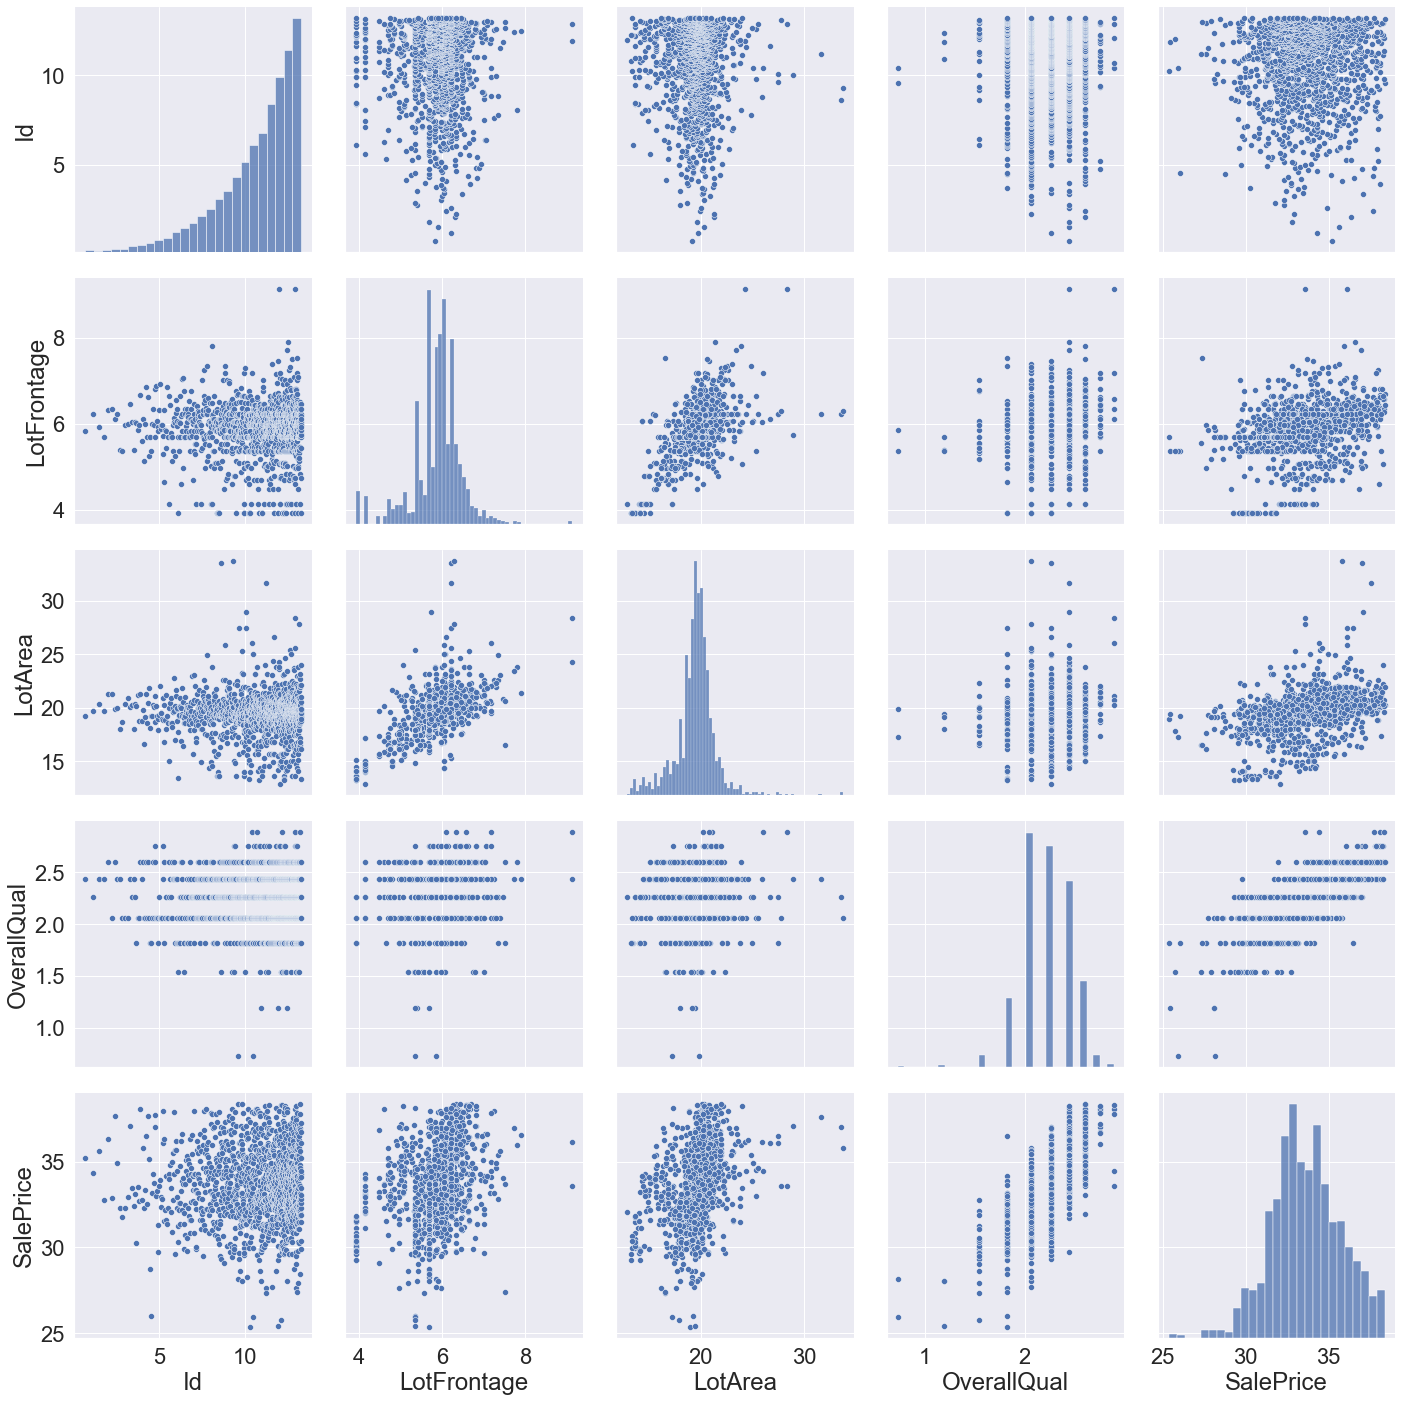

<Figure size 3600x4320 with 0 Axes>

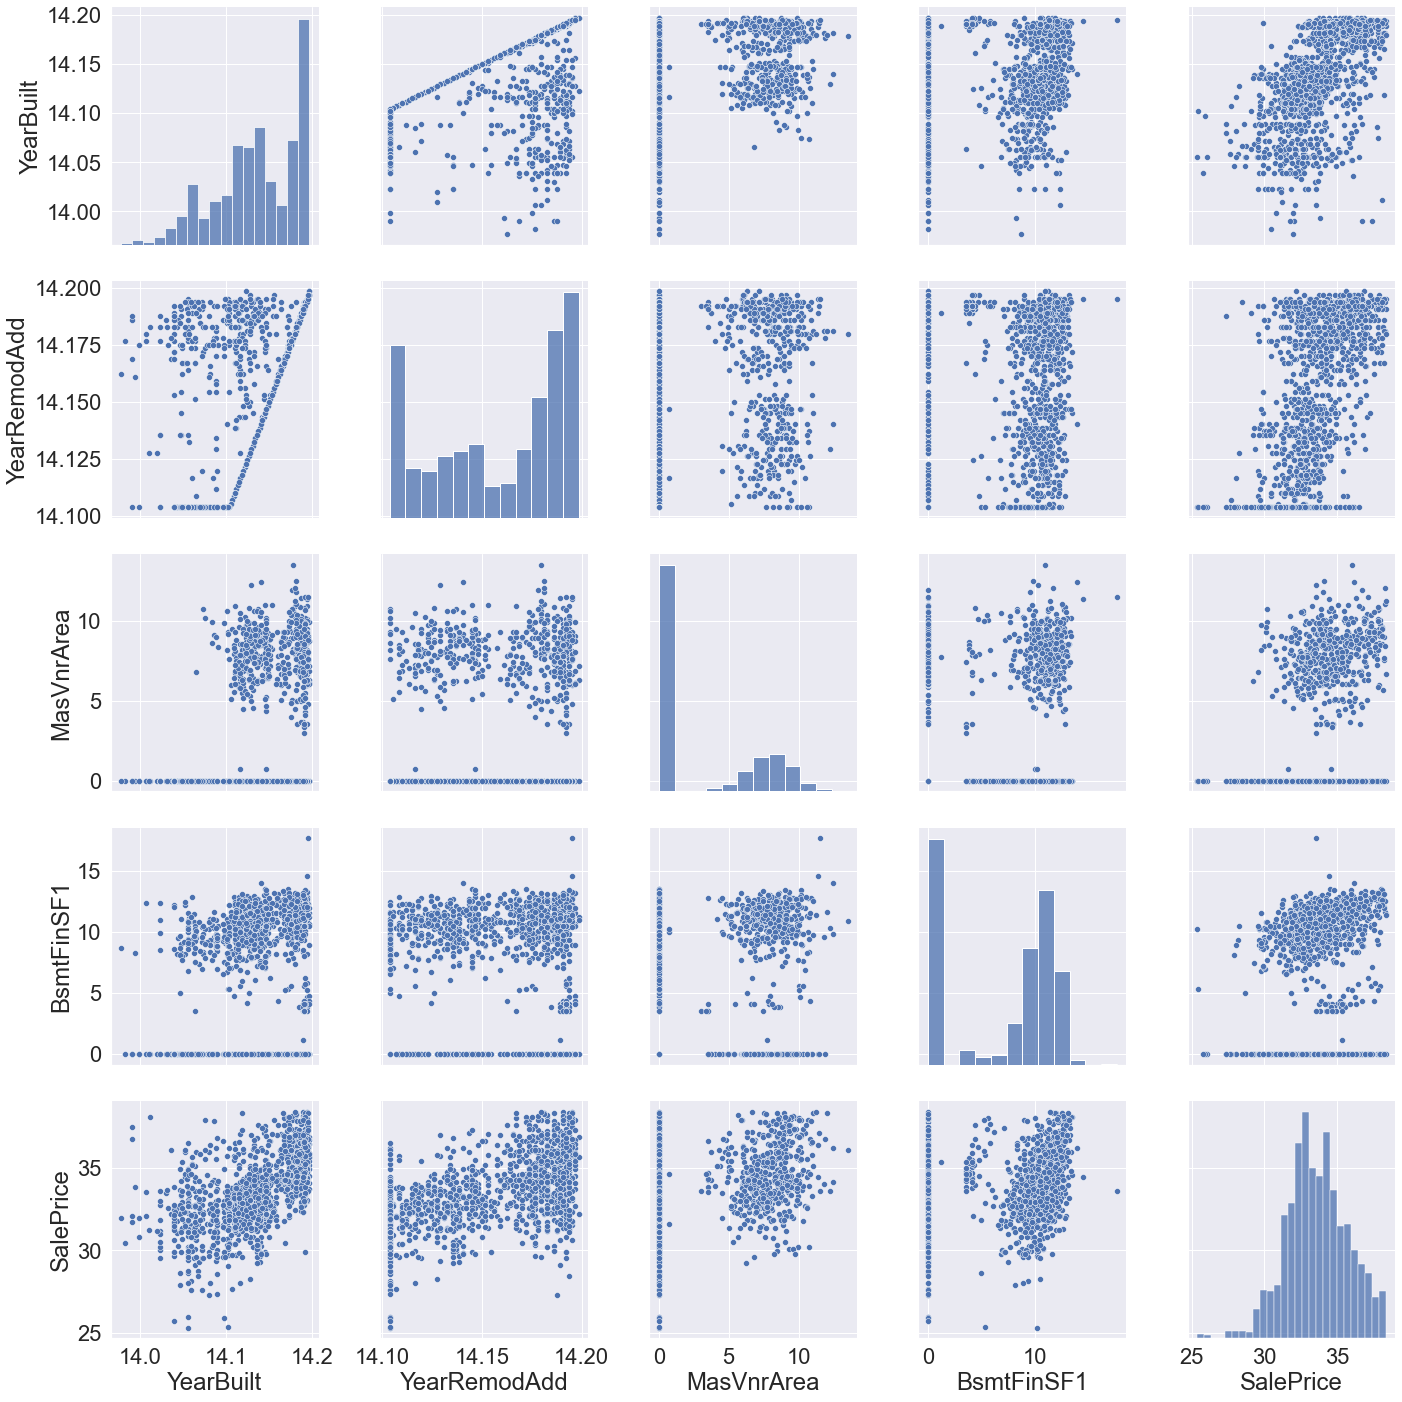

<Figure size 3600x4320 with 0 Axes>

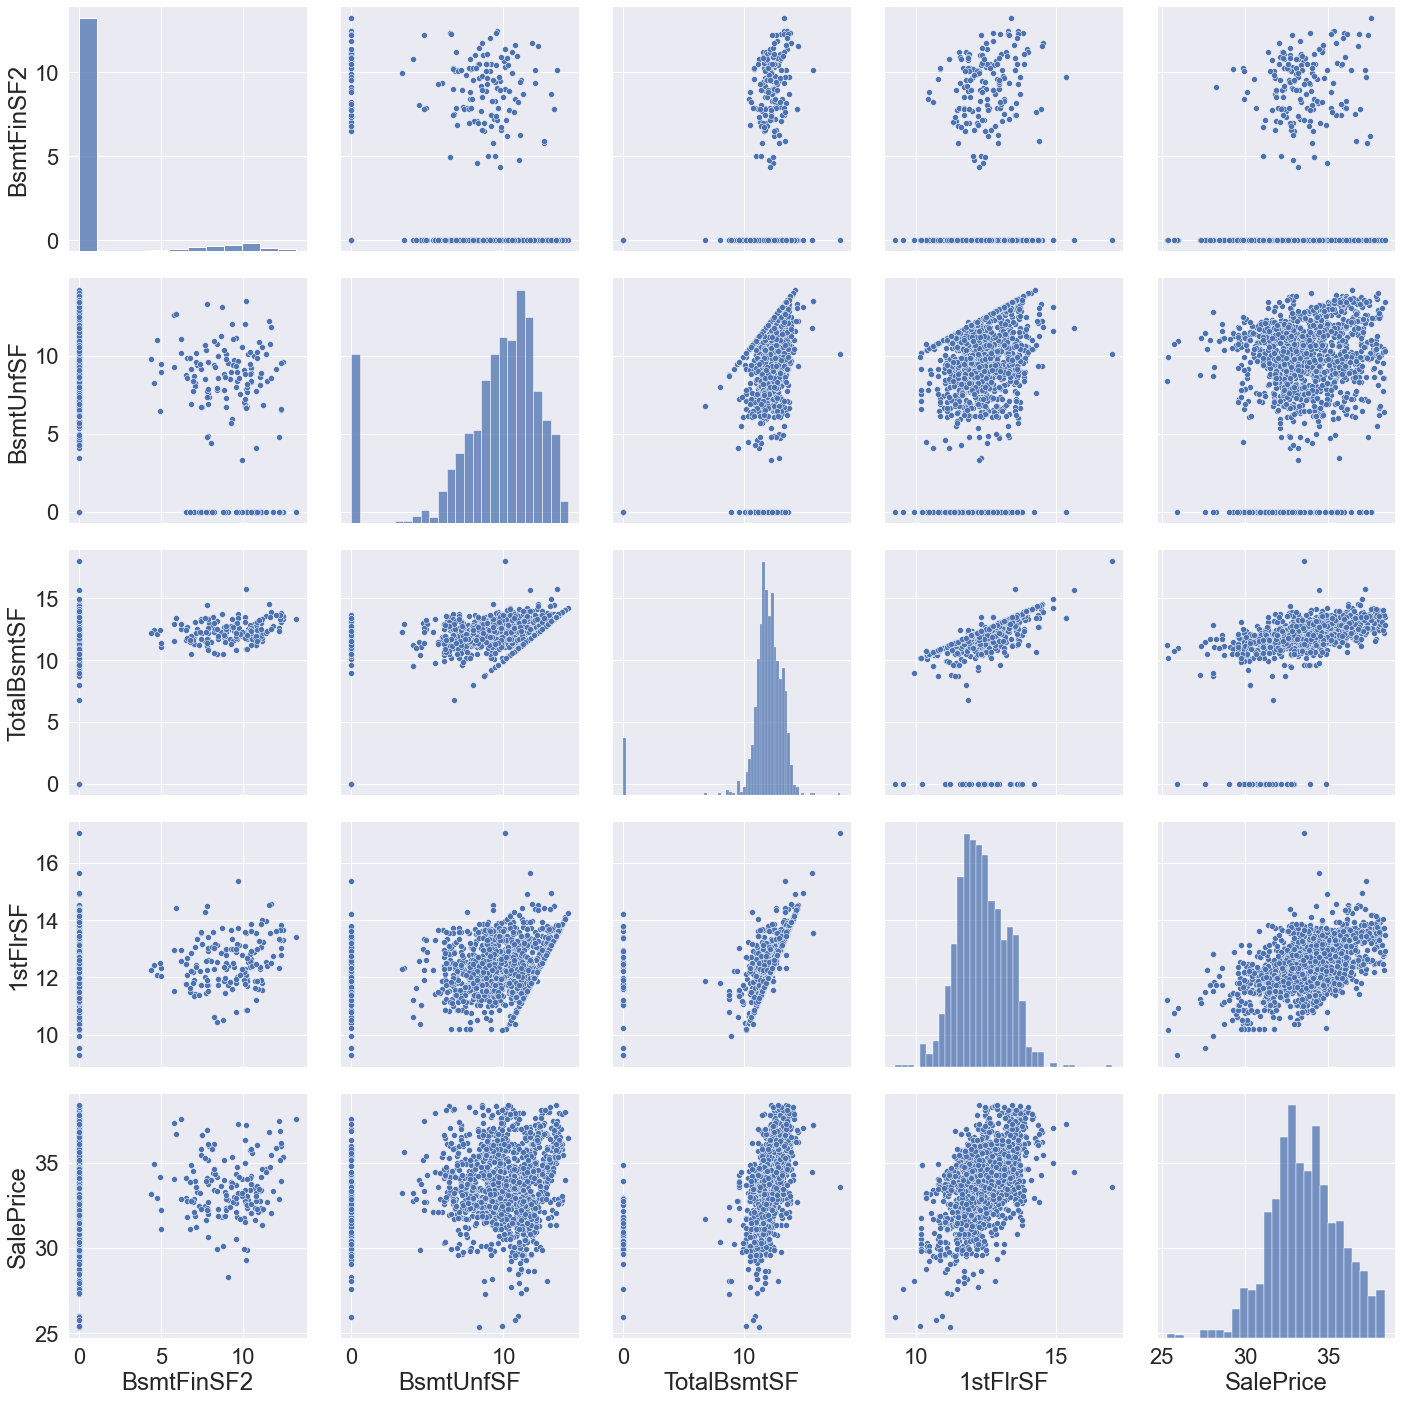

<Figure size 3600x4320 with 0 Axes>

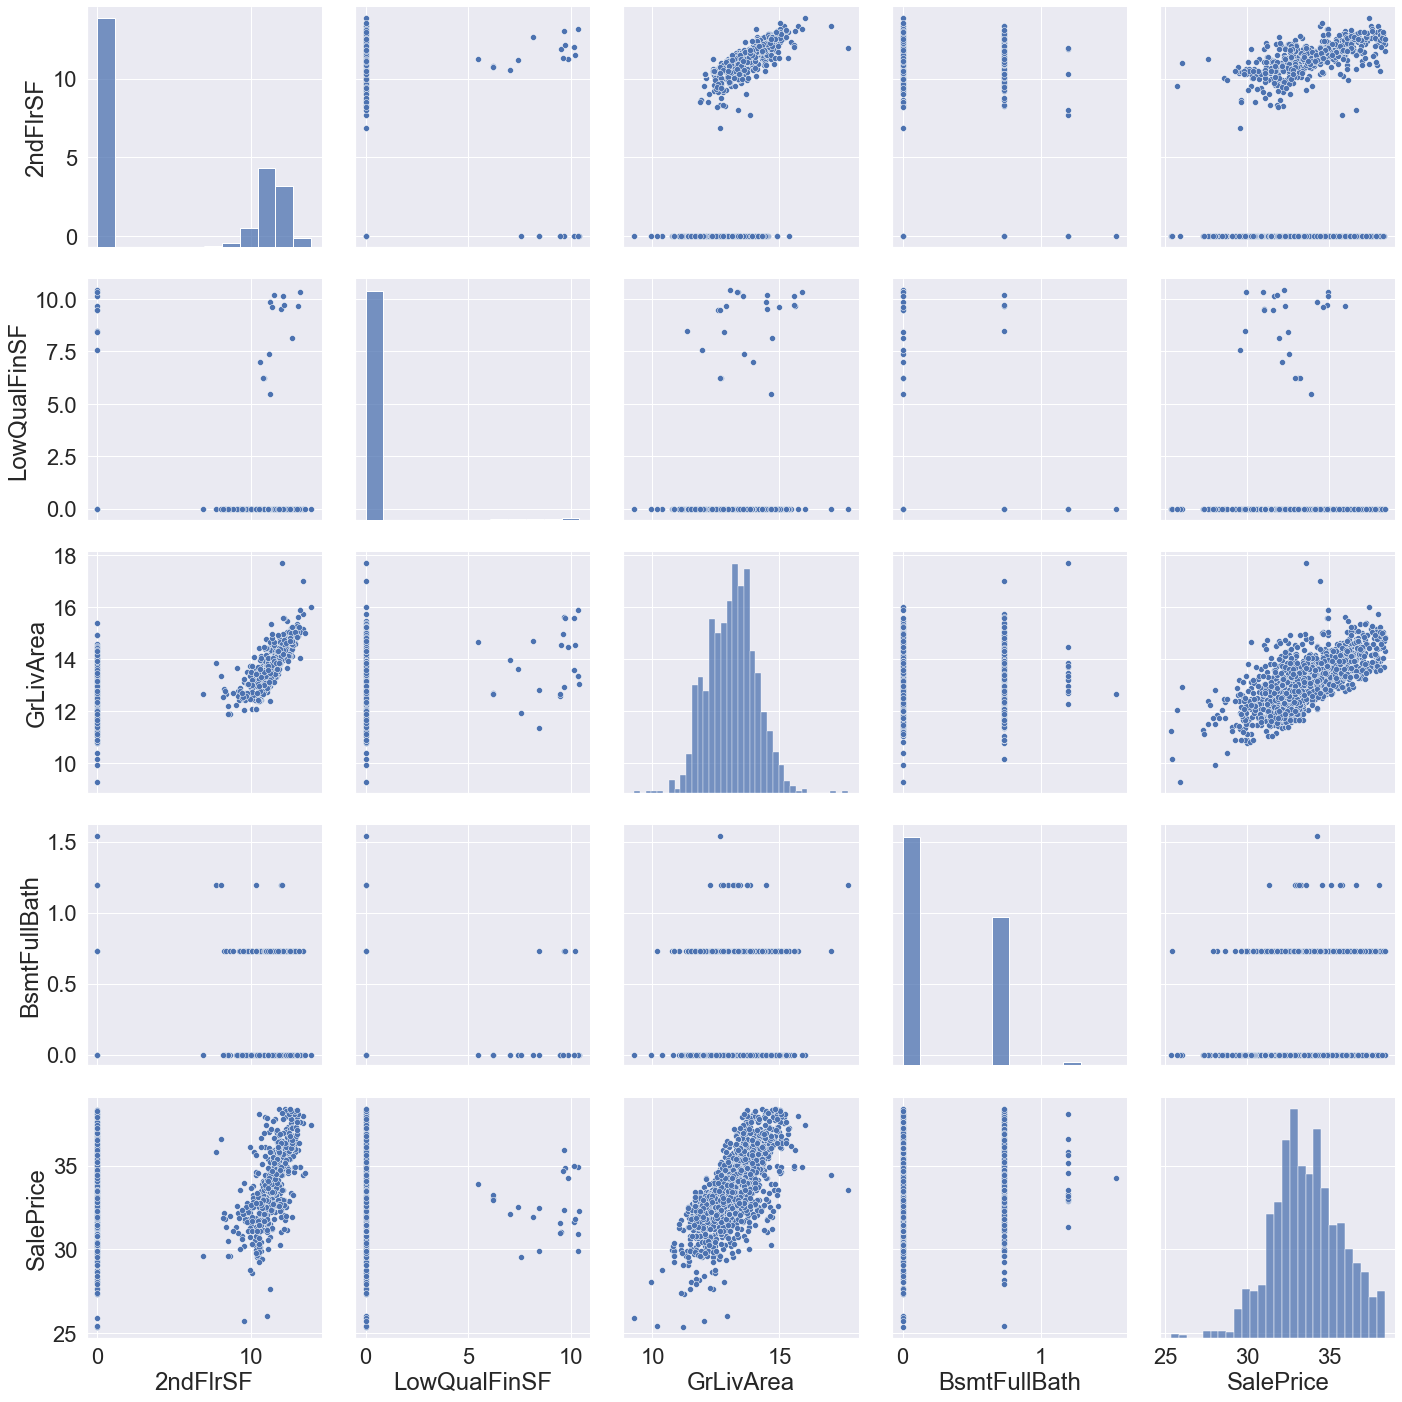

<Figure size 3600x4320 with 0 Axes>

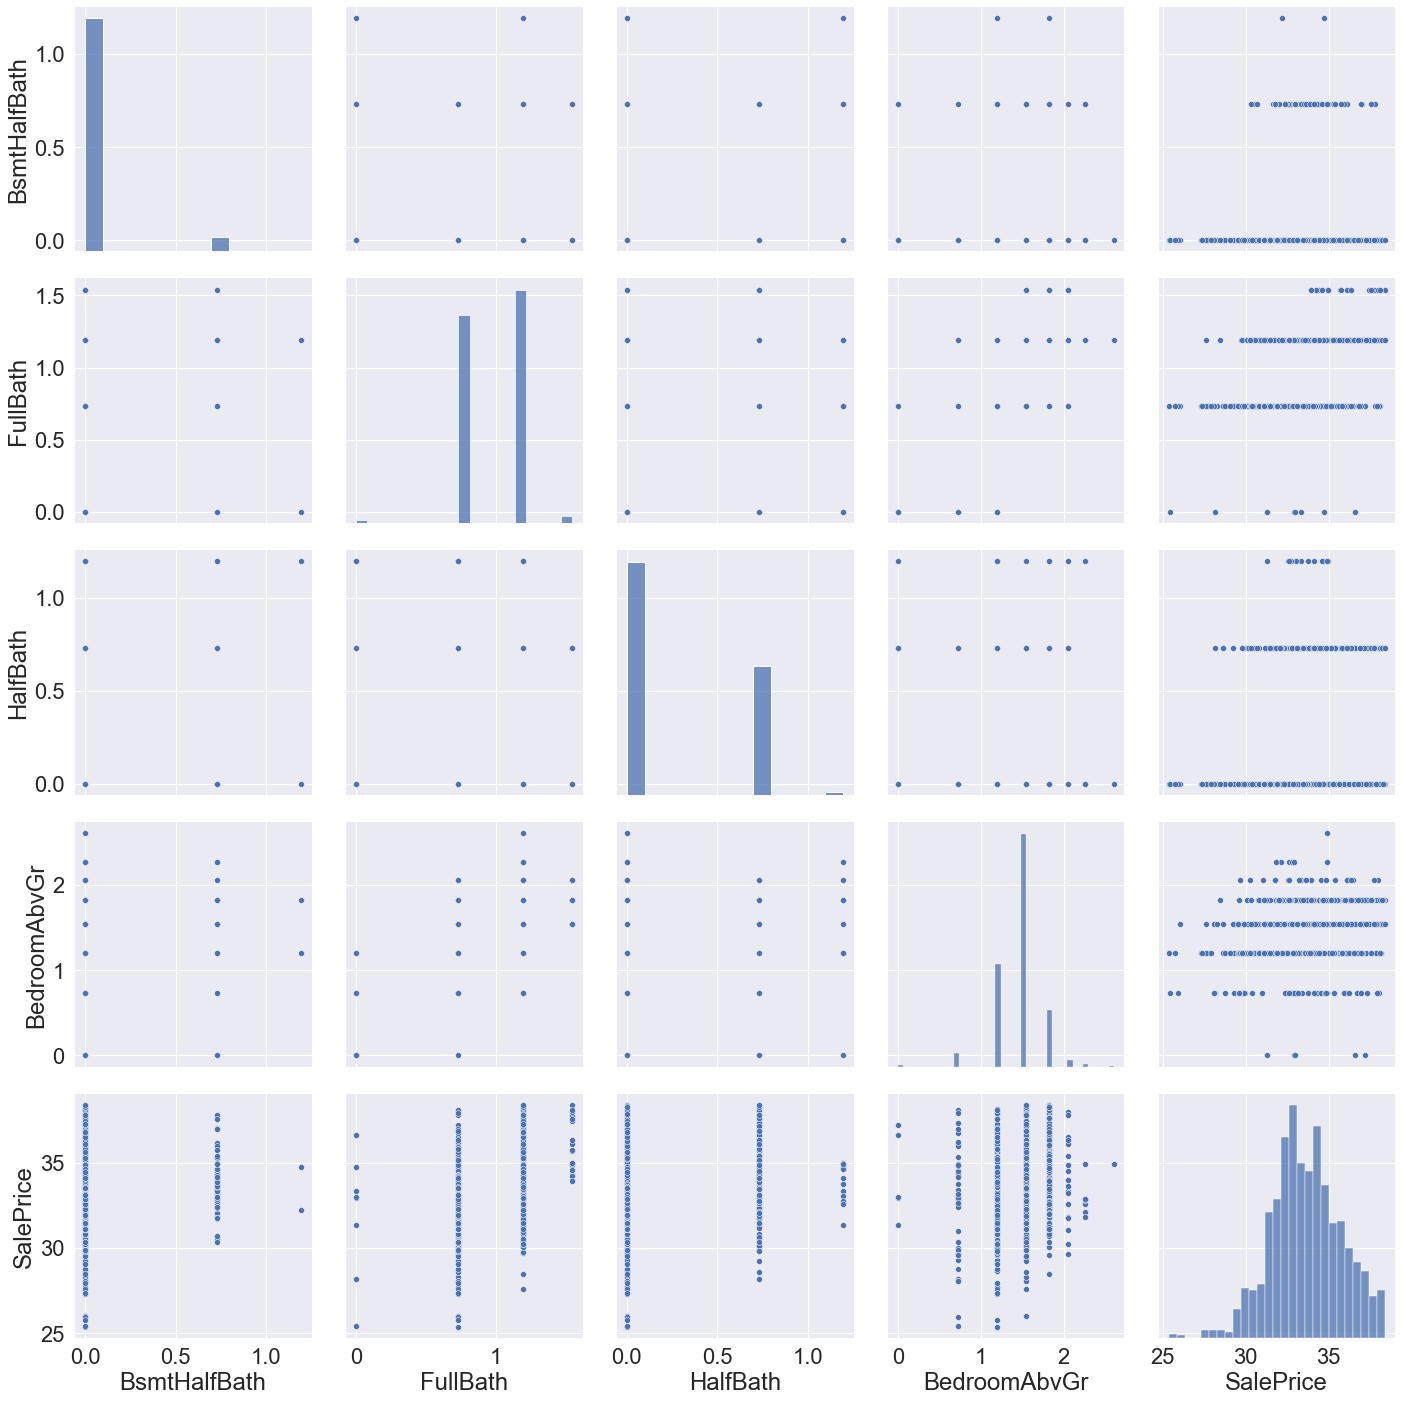

<Figure size 3600x4320 with 0 Axes>

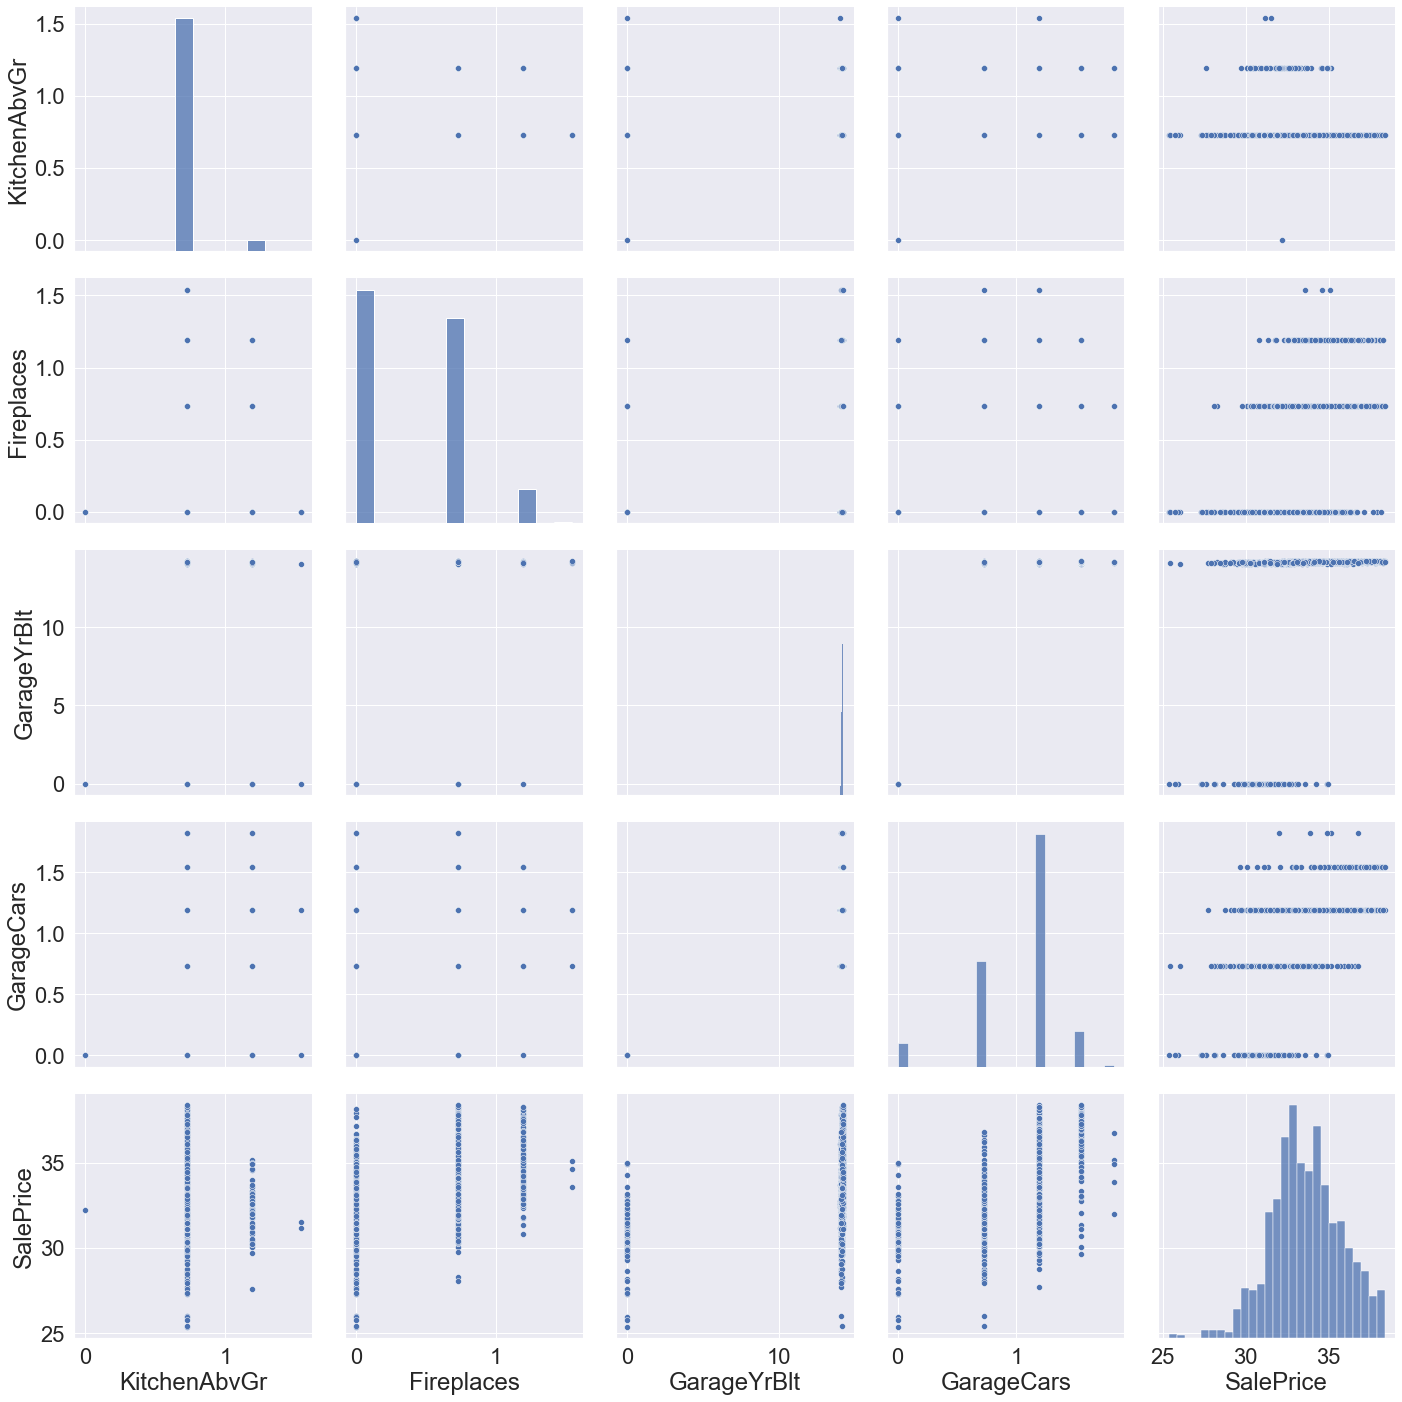

<Figure size 3600x4320 with 0 Axes>

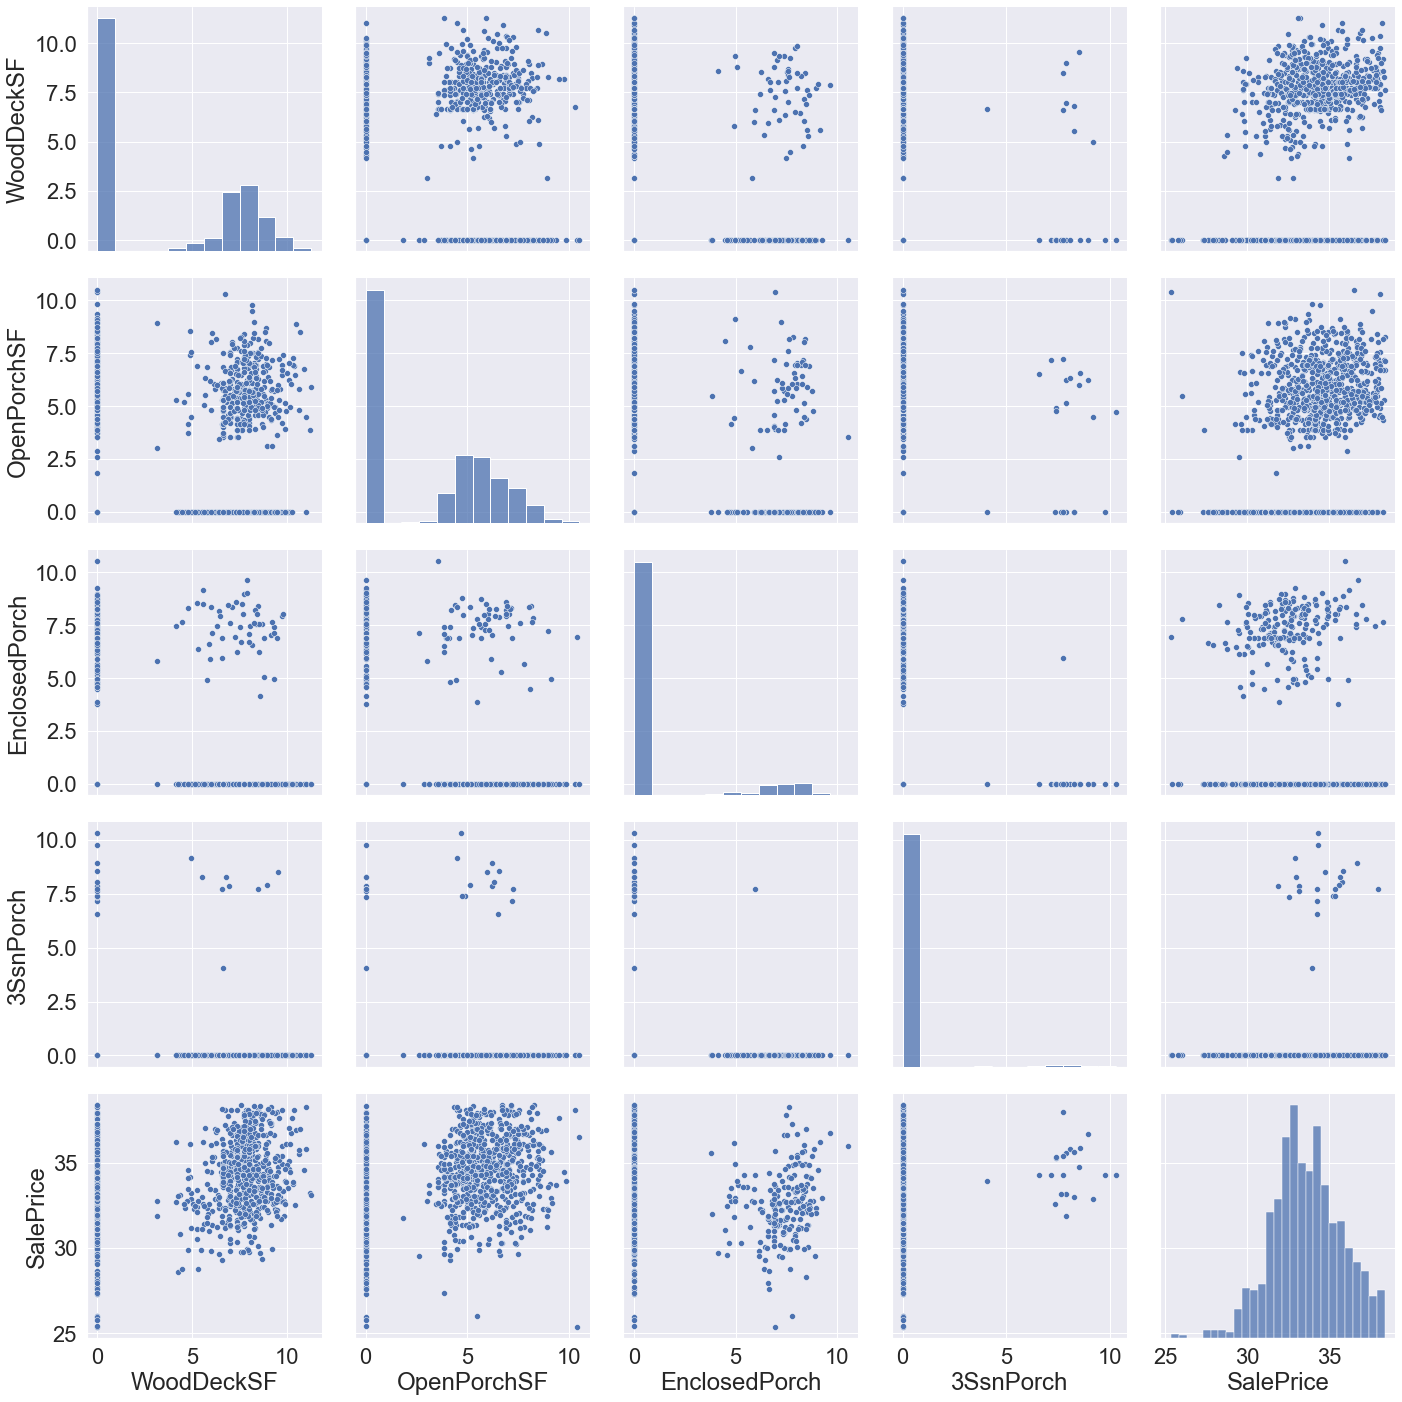

<Figure size 3600x4320 with 0 Axes>

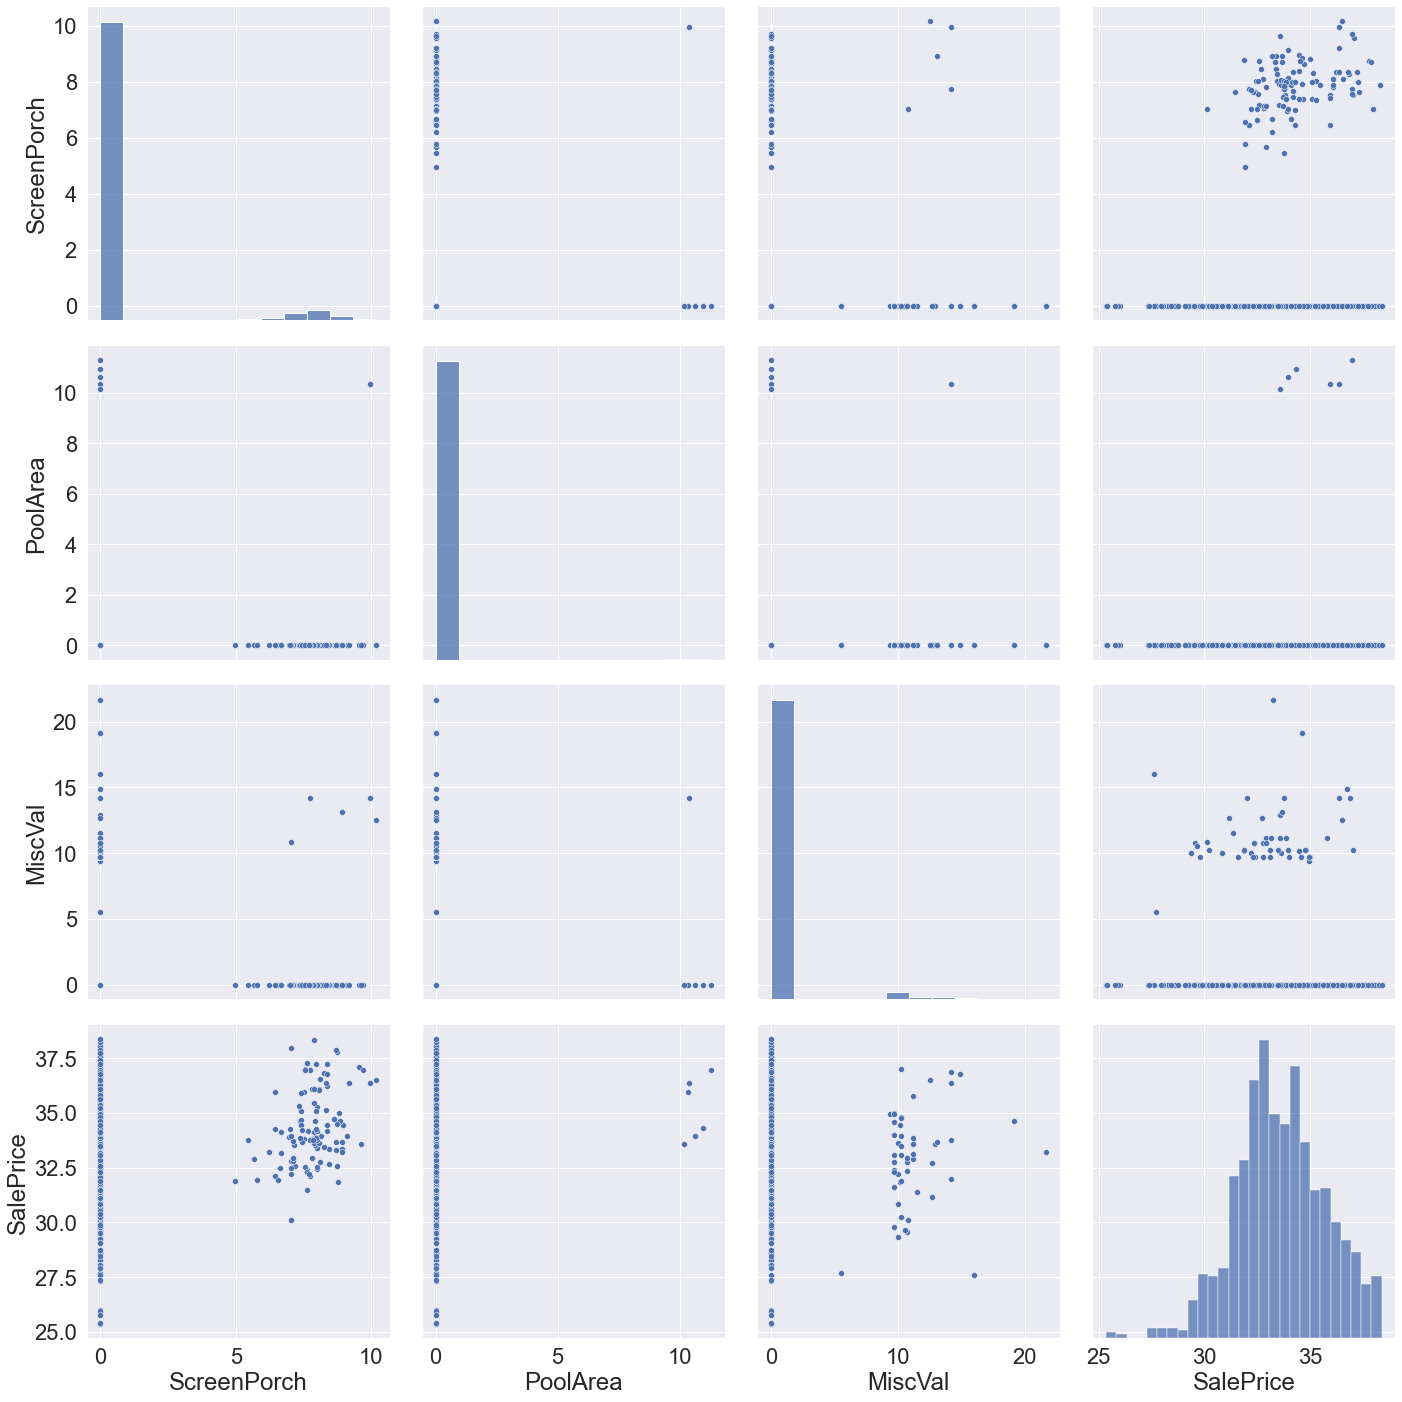

<Figure size 3600x4320 with 0 Axes>

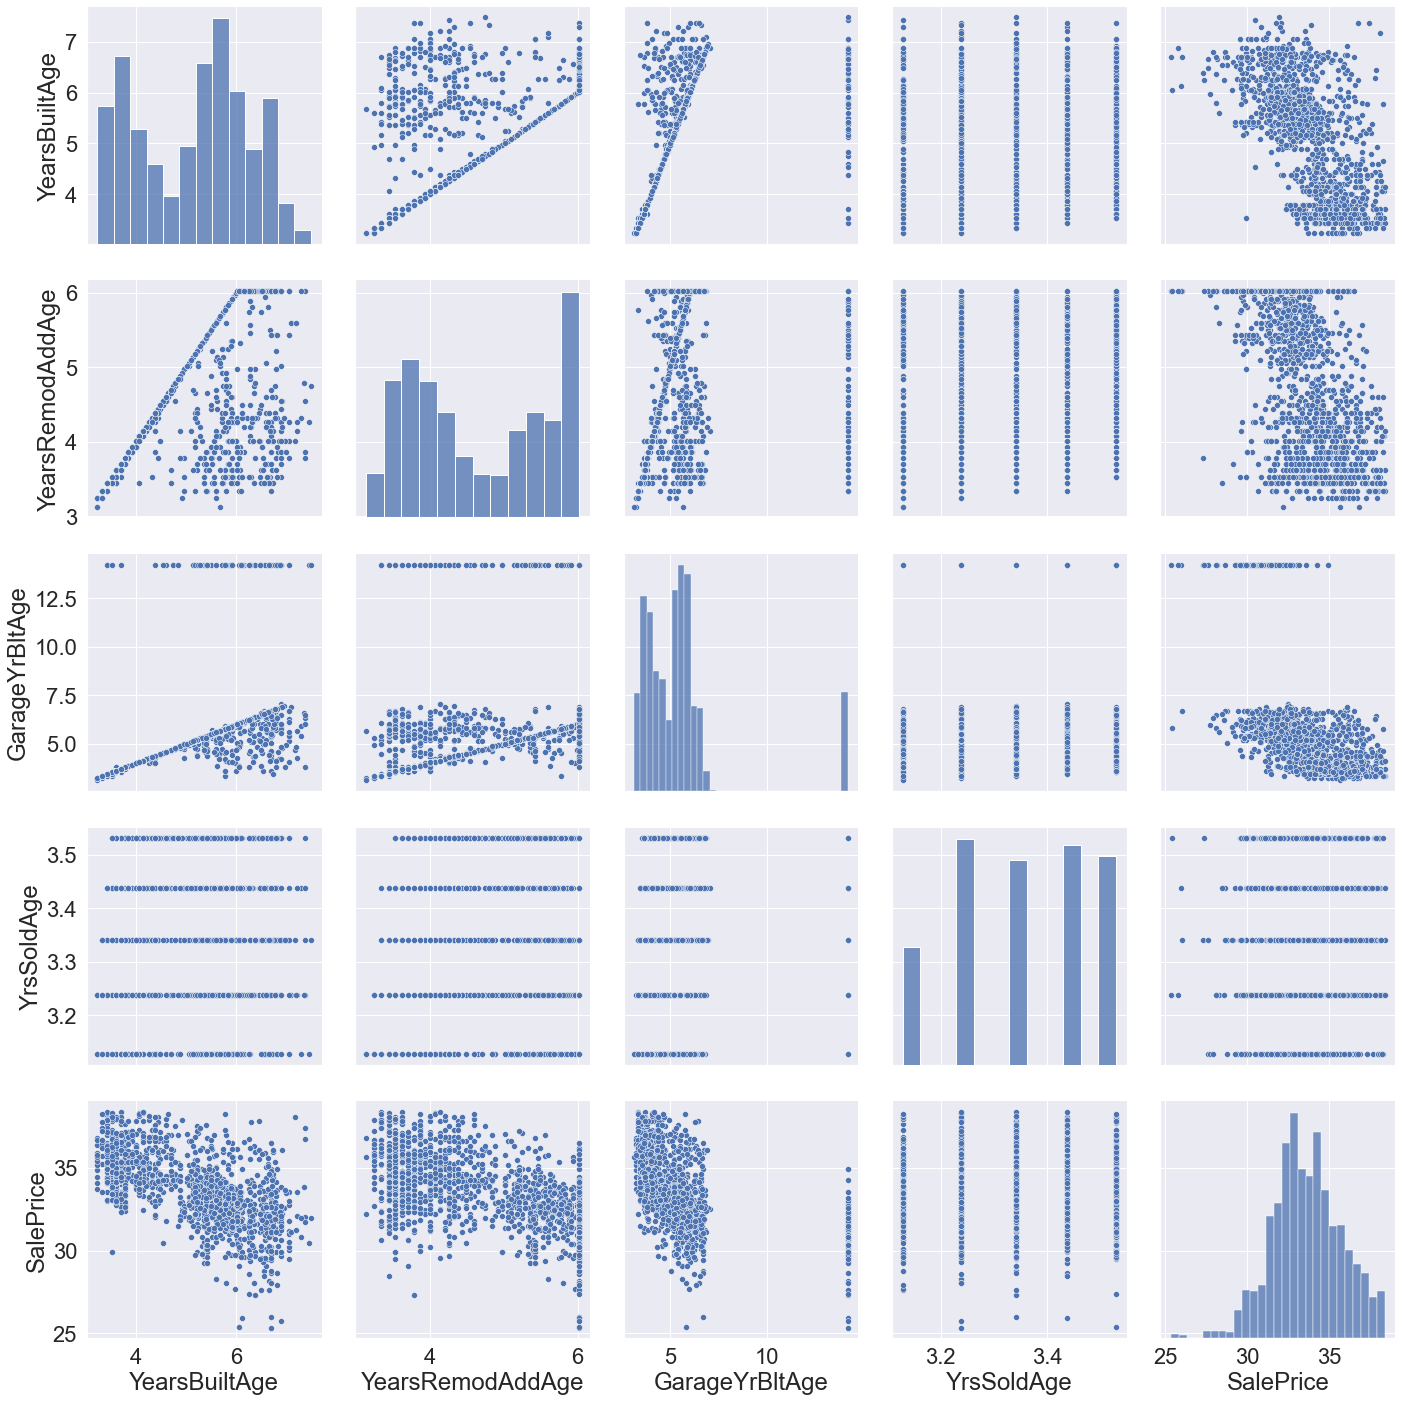

In [84]:
for i in range(0, len(master_list1)): # Do pair plots of numeric vars with the target SalePrice
    doPairPlots(master_list1[i])

- From the observation of last column of target variable, it can be observed that None of the independent variable has linear relationship with target variable ( Sales Price) So a plynomial regression of higher order is required to have a best fit model.
- Variables with high correlation values are already removed

Train test split before applying Standard Scaler

In [85]:
#  test train split
from sklearn.model_selection import train_test_split
#  feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Check for the VIF values  
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from math import sqrt

In [86]:
y= df_house_it4['SalePrice']
X = df_house_it4.drop('SalePrice', axis=1)

In [87]:
y.shape

(1399,)

In [88]:
X.shape

(1399, 303)

- Since the number of rows are limited so we will have train / test split of 80- 20 instead of 70 - 30 so that more data is available for training the model

In [89]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

#### Apply Standard Scaler

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Assign back the column names to np arrays
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

### Treating multicollinearity

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# ctreating custom function for VIF
def getVIFFactors(df):
    
    df_VIF = pd.DataFrame()
    df_VIF['variables'] = df.columns
    df_VIF['calculated_VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    df_VIF['calculated_VIF'] = round(df_VIF['calculated_VIF'],2)
    df_VIF = df_VIF.sort_values(by = "calculated_VIF", ascending = False)
    return(df_VIF)

In [94]:
getVIFFactors(X_train_scaled)

C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables  calculated_VIF
151     RoofMatl_Tar&Grv             inf
208          BsmtQual_TA             inf
206          BsmtQual_Gd             inf
205          BsmtQual_Fa             inf
204          BsmtQual_Ex             inf
..                   ...             ...
0                     Id            1.26
148     RoofMatl_Membran             NaN
149       RoofMatl_Metal             NaN
161  Exterior1st_ImStucc             NaN
260       Functional_Sev             NaN

[303 rows x 2 columns]

-  When the number of rows are less than this type of NAN are values are shown for VIF calculations in Python
- We can not proceed further with VIF analysis

##### As a complementory analysis of multi- collinearity reduction, we have already removed the variables which are highly correlated so we can proceed further

### Ridge Regression

In [95]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [96]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [97]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-0.48919668437034974


In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.019402      0.018326         0.003299        0.000401      0.0001   
1       0.010103      0.000667         0.004798        0.001165       0.001   
2       0.010399      0.001497         0.004303        0.000978        0.01   
3       0.009716      0.000385         0.003794        0.000754        0.05   
4       0.008706      0.001249         0.003413        0.000506         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.515326          -0.724332          -0.515593   
1   {'alpha': 0.001}          -0.512978          -0.638573          -0.516237   
2    {'alpha': 0.01}          -0.511655          -0.580653          -0.517623   
3    {'alpha': 0.05}          -0.511318          -0.572519          -0.517892   
4     {'alpha': 0.1}          -0.511178          -0.571138          -0.517900   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.495994  ...        -0.552009        0.086454               28   
1          -0.496537  ...        -0.535137        0.052159               26   
2          -0.497788  ...        -0.524232        0.028986               25   
3          -0.497702  ...        -0.522651        0.025839               24   
4          -0.497346  ...        -0.522284        0.025386               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.332334           -0.333369           -0.340648   
1           -0.333148           -0.333921           -0.340643   
2           -0.334277           -0.335048           -0.341134   
3           -0.334457           -0.335232           -0.341206   
4           -0.334483           -0.335241           -0.341190   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.342755           -0.319278         -0.333677         0.008249  
1           -0.343181           -0.319566         -0.334092         0.008215  
2           -0.344398           -0.320467         -0.335065         0.008218  
3           -0.344666           -0.320637         -0.335240         0.008226  
4           -0.344724           -0.320667         -0.335261         0.008225  

[5 rows x 21 columns]

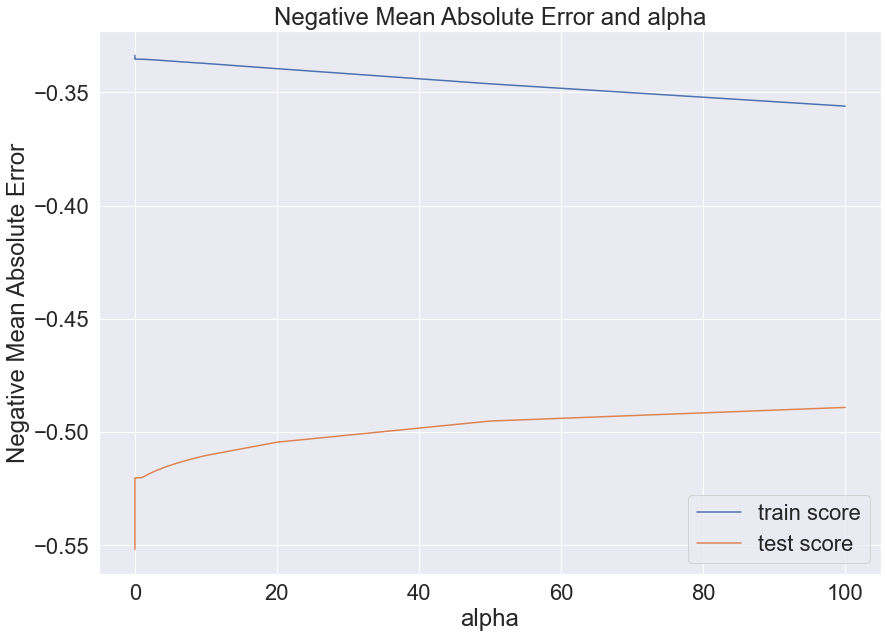

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(14,10))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [101]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
ridge_coef = ridge.coef_
ridge_coef[:16]

array([-0.02146043,  0.02140698,  0.20452234,  0.23335596,  0.10843361,
        0.07374447,  0.04552524,  0.07989038,  0.00118501, -0.05300582,
        0.10249341,  0.15763275,  0.07093608, -0.00434053,  0.29088039,
        0.08604351])

In [102]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train_scaled)
r2_ridge_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(r2_ridge_train)

0.9418659373448648


In [103]:
adj_r2_ridge_train = (1 - (1 - r2_ridge_train) * ((X_train_scaled.shape[0] - 1) / 
               (X_train_scaled.shape[0] - X_train_scaled.shape[1] - 1)))
print(adj_r2_ridge_train)

0.9202529054620354


In [104]:
#lets predict the R-squared value of test and test data
y_test_pred = ridge.predict(X_test_scaled)
r2_ridge_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_ridge_test)

0.896319233683768


- R2 score on Train Data is  0.9418659373448648
- R2 Score on Test  Data is  0.896319233683768  
- R2 score on test and train data close to each other and are well within acceptable limits. This shows that model is accurate enough and is not overfitted model.

So it can be concluded that the developed Ridge's Regression model is final and is accepted.


In [105]:
ridge_parameters = list(ridge.coef_)
ridge_parameters.insert(0, ridge.intercept_)
ridge_parameters = [round(x, 3) for x in ridge_parameters]
cols = X_train_scaled.columns
cols = cols.insert(0, "constant")
ridge_parameter_list = list(zip(cols, ridge_parameters))
final_features_ridge = (sorted(ridge_parameter_list, key=lambda x: abs(x[1]), reverse=True))[0:16]
final_features_ridge

[('constant', 33.578),
 ('tot_sq_ft', 0.301),
 ('GrLivArea', 0.291),
 ('OverallQual', 0.233),
 ('RoofMatl_ClyTile', -0.223),
 ('LotArea', 0.205),
 ('Condition2_PosN', -0.182),
 ('1stFlrSF', 0.158),
 ('GarageCars', 0.149),
 ('Neighborhood_Crawfor', 0.109),
 ('YearBuilt', 0.108),
 ('OverallCond_3', -0.108),
 ('KitchenQual_Ex', 0.108),
 ('YearsBuiltAge', -0.106),
 ('MSZoning_C (all)', -0.106),
 ('Exterior1st_BrkFace', 0.103)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'tot_sq_ft'),
  Text(1, 0, 'GrLivArea'),
  Text(2, 0, 'OverallQual'),
  Text(3, 0, 'RoofMatl_ClyTile'),
  Text(4, 0, 'LotArea'),
  Text(5, 0, 'Condition2_PosN'),
  Text(6, 0, '1stFlrSF'),
  Text(7, 0, 'GarageCars'),
  Text(8, 0, 'Neighborhood_Crawfor'),
  Text(9, 0, 'YearBuilt'),
  Text(10, 0, 'OverallCond_3'),
  Text(11, 0, 'KitchenQual_Ex'),
  Text(12, 0, 'YearsBuiltAge'),
  Text(13, 0, 'MSZoning_C (all)'),
  Text(14, 0, 'Exterior1st_BrkFace')])

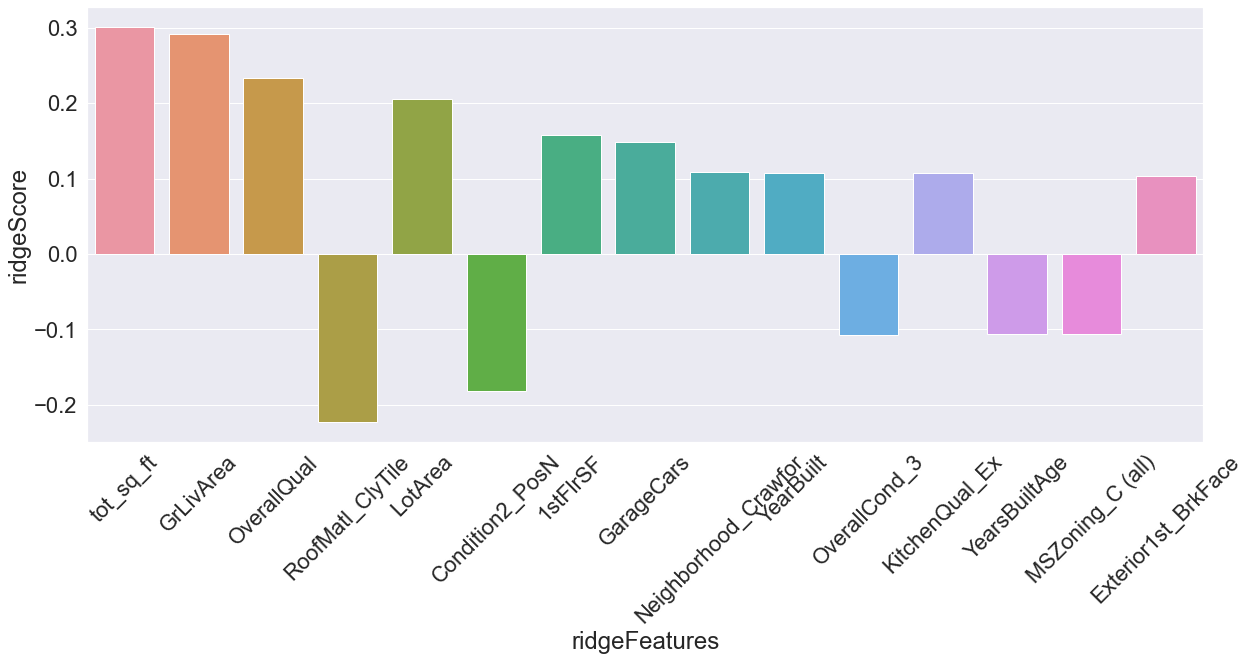

In [106]:
# sort in-place from highest to lowest
final_features_ridge.sort(key=lambda x: abs(x[1]), reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
ridge_features = list(zip(*final_features_ridge))[0]
ridge_score = list(zip(*final_features_ridge))[1]

ridge_features_df = pd.DataFrame(
    {'ridgeFeatures': ridge_features,
     'ridgeScore': ridge_score,
    })
plt.figure(figsize = (20,8))
sns.barplot(x='ridgeFeatures',y='ridgeScore',data=ridge_features_df[1:])
plt.xticks(rotation=45)

### Lasso

In [107]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.01}
-0.46927221570563526


In [109]:
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.154200      0.040850         0.006103        0.002196      0.0001   
1       0.115091      0.024846         0.005399        0.002418       0.001   
2       0.041821      0.011681         0.004112        0.001552        0.01   
3       0.035201      0.015082         0.004502        0.002003        0.05   
4       0.023617      0.008196         0.004798        0.001163         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.506940          -0.567227          -0.512540   
1   {'alpha': 0.001}          -0.482442          -0.543297          -0.503255   
2    {'alpha': 0.01}          -0.441165          -0.494134          -0.471755   
3    {'alpha': 0.05}          -0.477937          -0.526149          -0.504432   
4     {'alpha': 0.1}          -0.543778          -0.576070          -0.562774   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.494243  ...        -0.518817        0.025140                4   
1          -0.480461  ...        -0.503710        0.022756                3   
2          -0.441561  ...        -0.469272        0.024466                1   
3          -0.471940  ...        -0.501952        0.023736                2   
4          -0.520234  ...        -0.556234        0.021795                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.334653           -0.335212           -0.341243   
1           -0.338106           -0.337188           -0.341456   
2           -0.360614           -0.364518           -0.366101   
3           -0.452311           -0.453129           -0.446753   
4           -0.532429           -0.520939           -0.522970   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.344601           -0.320996         -0.335341         0.008085  
1           -0.346528           -0.323398         -0.337335         0.007698  
2           -0.369430           -0.348071         -0.361747         0.007403  
3           -0.454194           -0.436721         -0.448622         0.006482  
4           -0.522297           -0.515621         -0.522851         0.005440  

[5 rows x 21 columns]

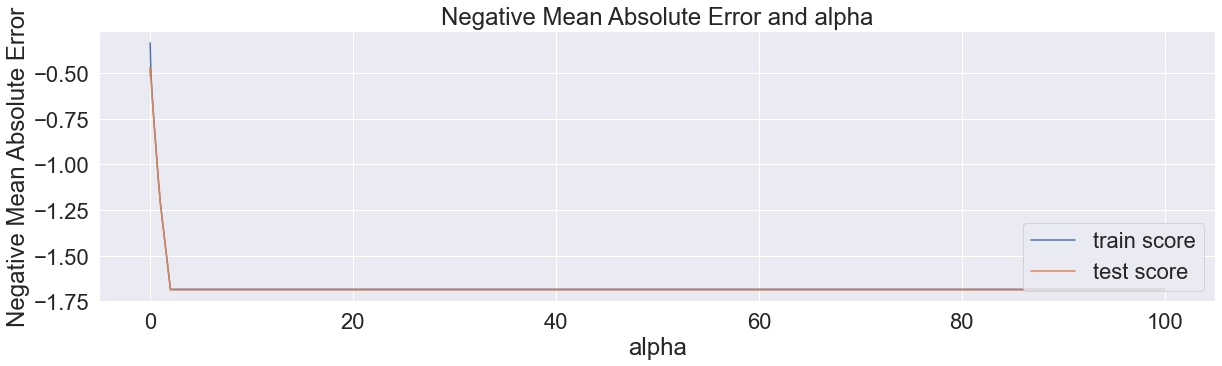

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(20,5))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [111]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.coef_
lasso_coef[:20]

array([-0.01429846,  0.        ,  0.22378075,  0.29692993,  0.11998648,
        0.11513363,  0.0208659 ,  0.09681712, -0.        , -0.06766312,
       -0.        ,  0.        ,  0.        , -0.        ,  0.43924666,
        0.07876943,  0.01530912,  0.03535581,  0.00685544, -0.        ])

In [112]:
#Lets predict the R-squared value of test and train data
y_train_pred_lasso = lasso.predict(X_train_scaled)
r2_lasso_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso)
print(r2_lasso_train)

0.9391779262003485


In [113]:
adj_r2_lasso_train = (1 - (1 - r2_lasso_train) * ((X_train_scaled.shape[0] - 1) / 
               (X_train_scaled.shape[0] - X_train_scaled.shape[1] - 1)))
print(adj_r2_lasso_train)

0.916565547842932


In [114]:
#Lets predict the R-squared value of test and test data
y_test_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
print(r2_lasso_test)

0.9049975184618718


- R2 score on Train Data is  0.9391779262003485
- R2 Score on Test  Data is  0.9049975184618718
- For Lasso Regression model, the difference between the train and test R2 score is less than Ridge Regression model
- R2 score on test and train data close to each other and are well within acceptable limits. This shows that model is accurate enough and is not overfitted model.

So it can be concluded that the developed Loasso  Regression model is final and is accepted.

In [115]:
lasso_parameters = list(lasso.coef_)
lasso_parameters.insert(0, lasso.intercept_)
lasso_parameters = [round(x, 3) for x in lasso_parameters]
cols = X_train_scaled.columns
cols = cols.insert(0, "constant")
lasso_parameter_list = list(zip(cols, lasso_parameters))
final_features_lasso = sorted(lasso_parameter_list, key=lambda x: abs(x[1]), reverse=True)[0:16]
final_features_lasso

[('constant', 33.578),
 ('tot_sq_ft', 0.473),
 ('GrLivArea', 0.439),
 ('OverallQual', 0.297),
 ('RoofMatl_ClyTile', -0.267),
 ('YearsBuiltAge', -0.229),
 ('LotArea', 0.224),
 ('Condition2_PosN', -0.202),
 ('GarageCars', 0.178),
 ('Neighborhood_Crawfor', 0.129),
 ('YearBuilt', 0.12),
 ('KitchenQual_Ex', 0.118),
 ('YearRemodAdd', 0.115),
 ('MSZoning_C (all)', -0.106),
 ('OverallCond_3', -0.104),
 ('MSZoning_RM', -0.103)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'tot_sq_ft'),
  Text(1, 0, 'GrLivArea'),
  Text(2, 0, 'OverallQual'),
  Text(3, 0, 'RoofMatl_ClyTile'),
  Text(4, 0, 'YearsBuiltAge'),
  Text(5, 0, 'LotArea'),
  Text(6, 0, 'Condition2_PosN'),
  Text(7, 0, 'GarageCars'),
  Text(8, 0, 'Neighborhood_Crawfor'),
  Text(9, 0, 'YearBuilt'),
  Text(10, 0, 'KitchenQual_Ex'),
  Text(11, 0, 'YearRemodAdd'),
  Text(12, 0, 'MSZoning_C (all)'),
  Text(13, 0, 'OverallCond_3'),
  Text(14, 0, 'MSZoning_RM')])

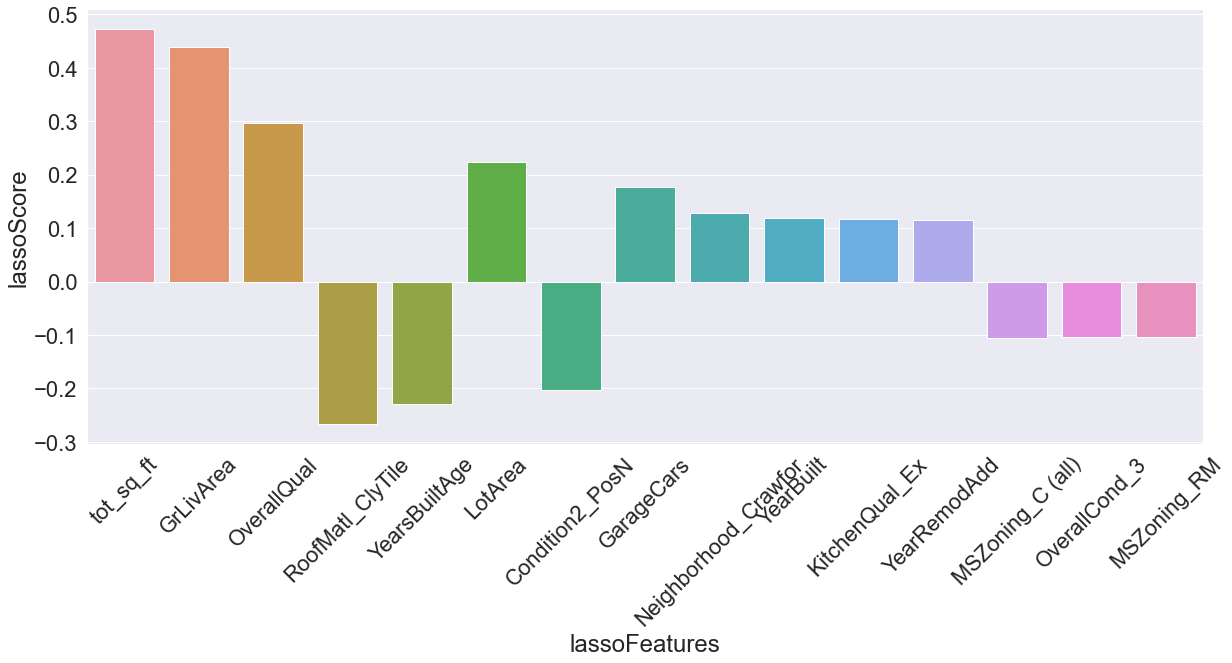

In [116]:
# sort in-place from highest to lowest
final_features_lasso.sort(key=lambda x: abs(x[1]), reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
lasso_features = list(zip(*final_features_lasso))[0]
lasso_score = list(zip(*final_features_lasso))[1]

lasso_features_df = pd.DataFrame(
    {'lassoFeatures': lasso_features,
     'lassoScore': lasso_score,
    })
plt.figure(figsize = (20,8))
sns.barplot(x='lassoFeatures',y='lassoScore',data=lasso_features_df[1:])
plt.xticks(rotation=45)

### FInal Recommendations

#### Data Cleaning and Exploratory Data Analytics

- Steps such as null value treatment, imputation of misssing values, categorical variable treatment, skewness removal in numerical data and senity check at each critical step ensured the right quality of input to build the regression models
- Detailed univariate and Bivariate EDA was performed to study the variations of independent varaiables, their skewness and effect of these independent parametes on sales price. It resulted into good understanding of the busniness problem under stufy

#### Feature Engineering

- Conversion of data type as per the  variables
- Removal of constant features from the database
- Removal of duplicate rows from the database
- Removal of Quasi- constant features
- Removal of duplicate features
- Removal of correlated feature

This resulted into optimum number of features ready for the Regression Model building

#### Regurization Techniques for Regression- Ridge and Lasso

#### Hyper parameter tuning results

- For Ridge Regression various values of Alpha parameters were changes and using Grid Search optimization algorithm, the final value of Alha is 100 

- For Lasso Regression various values of Alpha parameters were changes and using Grid Search optimization algorithm, the final value of Alha is 0.01 

#### Model Performance Metrics

- For both Ridge and Lasso Regression Models, the R2 score for train and test data is close and near 0.9. It is as per industry norms and predictions made by these models for sales price will be accurate and ultimately help business

#### Top five features of Ridge Regression Model are as follows (Parameters, Coefficient)

- ('constant', 33.578)
- ('tot_sq_ft', 0.301)
- ('GrLivArea', 0.291)
- ('OverallQual', 0.233)
- ('RoofMatl_ClyTile', -0.223)
- ('LotArea', 0.205)

#### Top five features of Lasso Regression Model are as follows (Parameters, Coefficient)

-  ('constant', 33.578)
-  ('tot_sq_ft', 0.473)
-  ('GrLivArea', 0.439)
-  ('OverallQual', 0.297)
-  ('RoofMatl_ClyTile', -0.267)
-  ('YearsBuiltAge', -0.229)

#### End of Analysis by Shailesh Kadre








####                                              Subjective Questions - Solutions are analysed in following section



In [117]:
alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.coef_
lasso_coef[:20]

array([-0.00386732,  0.        ,  0.20463572,  0.34633703,  0.13907603,
        0.135718  ,  0.00968143,  0.10889088, -0.        , -0.04716477,
       -0.        ,  0.        ,  0.        , -0.        ,  0.4420487 ,
        0.0697018 ,  0.00306211,  0.02657802,  0.        , -0.        ])

In [118]:
lasso_parameters = list(lasso.coef_)
lasso_parameters.insert(0, lasso.intercept_)
lasso_parameters = [round(x, 3) for x in lasso_parameters]
cols = X_train_scaled.columns
cols = cols.insert(0, "constant")
lasso_parameter_list = list(zip(cols, lasso_parameters))
final_features_lasso = sorted(lasso_parameter_list, key=lambda x: abs(x[1]), reverse=True)[0:16]
final_features_lasso

[('constant', 33.578),
 ('tot_sq_ft', 0.444),
 ('GrLivArea', 0.442),
 ('OverallQual', 0.346),
 ('RoofMatl_ClyTile', -0.253),
 ('LotArea', 0.205),
 ('Condition2_PosN', -0.185),
 ('GarageCars', 0.181),
 ('YearsBuiltAge', -0.173),
 ('YearBuilt', 0.139),
 ('YearRemodAdd', 0.136),
 ('Neighborhood_Crawfor', 0.118),
 ('KitchenQual_Ex', 0.11),
 ('BsmtFinSF1', 0.109),
 ('MSZoning_RM', -0.102),
 ('OverallCond_3', -0.097)]

In [119]:
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
ridge_coef = ridge.coef_
ridge_coef[:16]

array([-0.02165587,  0.03124225,  0.16847727,  0.21866245,  0.0804258 ,
        0.06939543,  0.04202497,  0.07250162,  0.00410782, -0.03574714,
        0.0891437 ,  0.16822158,  0.06457042, -0.00074294,  0.25603533,
        0.08200025])

In [120]:
ridge_parameters = list(ridge.coef_)
ridge_parameters.insert(0, ridge.intercept_)
ridge_parameters = [round(x, 3) for x in ridge_parameters]
cols = X_train_scaled.columns
cols = cols.insert(0, "constant")
ridge_parameter_list = list(zip(cols, ridge_parameters))
final_features_ridge = (sorted(ridge_parameter_list, key=lambda x: abs(x[1]), reverse=True))[0:16]
final_features_ridge

[('constant', 33.578),
 ('tot_sq_ft', 0.262),
 ('GrLivArea', 0.256),
 ('OverallQual', 0.219),
 ('RoofMatl_ClyTile', -0.191),
 ('LotArea', 0.168),
 ('1stFlrSF', 0.168),
 ('Condition2_PosN', -0.16),
 ('GarageCars', 0.135),
 ('KitchenQual_Ex', 0.105),
 ('Neighborhood_Crawfor', 0.102),
 ('FullBath', 0.101),
 ('OverallCond_3', -0.101),
 ('Fireplaces', 0.098),
 ('Exterior1st_BrkFace', 0.097),
 ('MSZoning_C (all)', -0.096)]